# Home Credit data
# Notebook 1: Data Preparation and EDA

**Table of contents**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
  - 1.1. [Libraries](#toc1_1_)    
- 2. [Data acquisition](#toc2_)    
  - 2.1. [Dataset documentation](#toc2_1_)    
  - 2.2. [Downloading the dataset and reviewing meta data](#toc2_2_)    
  - 2.3. [Load data](#toc2_3_)    
- 3. [Adversarial Validation](#toc3_)    
  - 3.1. [Relevant features](#toc3_1_)    
- 4. [Exploratory Data Analysis (EDA)](#toc4_)    
  - 4.1. [Data overview](#toc4_1_)    
  - 4.2. [application_train](#toc4_2_)    
    - 4.2.1. [Features from Main Table: Descriptive Statistics, Relationship with Target(s) & Outliers, Encoding](#toc4_2_1_)    
      - 4.2.1.1. [Loan default risk (TARGET)](#toc4_2_1_1_)    
      - 4.2.1.2. [NAME_CONTRACT_TYPE](#toc4_2_1_2_)    
      - 4.2.1.3. [CODE_GENDER](#toc4_2_1_3_)    
      - 4.2.1.4. [DAYS_BIRTH - AGE](#toc4_2_1_4_)    
      - 4.2.1.5. [FLAG_OWN_CAR](#toc4_2_1_5_)    
      - 4.2.1.6. [FLAG_OWN_REALTY](#toc4_2_1_6_)    
      - 4.2.1.7. [CNT_CHILDREN](#toc4_2_1_7_)    
      - 4.2.1.8. [AMT_INCOME_TOTAL](#toc4_2_1_8_)    
      - 4.2.1.9. [AMT_CREDIT](#toc4_2_1_9_)    
      - 4.2.1.10. [AMT_ANNUITY](#toc4_2_1_10_)    
      - 4.2.1.11. [AMT_GOODS_PRICE](#toc4_2_1_11_)    
      - 4.2.1.12. [NAME_TYPE_SUITE](#toc4_2_1_12_)    
      - 4.2.1.13. [NAME_INCOME_TYPE](#toc4_2_1_13_)    
      - 4.2.1.14. [NAME_EDUCATION_TYPE](#toc4_2_1_14_)    
      - 4.2.1.15. [NAME_FAMILY_STATUS](#toc4_2_1_15_)    
      - 4.2.1.16. [NAME_HOUSING_TYPE](#toc4_2_1_16_)    
      - 4.2.1.17. [OCCUPATION_TYPE](#toc4_2_1_17_)    
      - 4.2.1.18. [CNT_FAM_MEMBERS](#toc4_2_1_18_)    
      - 4.2.1.19. [ORGANIZATION_TYPE](#toc4_2_1_19_)    
      - 4.2.1.20. [Aggregated features](#toc4_2_1_20_)    
      - 4.2.1.21. [LIVINGAREA](#toc4_2_1_21_)    
      - 4.2.1.22. [COMMONAREA](#toc4_2_1_22_)    
      - 4.2.1.23. [Other aggregated features](#toc4_2_1_23_)    
      - 4.2.1.24. [Other aggregated features with only one aggregation type](#toc4_2_1_24_)    
      - 4.2.1.25. [Document flag features](#toc4_2_1_25_)    
      - 4.2.1.26. [AMT_REQ_CREDIT_BUREAU features](#toc4_2_1_26_)    
      - 4.2.1.27. [SOCIAL_CIRCLE features](#toc4_2_1_27_)    
      - 4.2.1.28. [EXT_SOURCE](#toc4_2_1_28_)    
      - 4.2.1.29. [DAYS_LAST_PHONE_CHANGE](#toc4_2_1_29_)    
    - 4.2.2. [Missing values](#toc4_2_2_)    
    - 4.2.3. [Handling Duplicates](#toc4_2_3_)    
  - 4.3. [Dataset aggregation](#toc4_3_)    
    - 4.3.1. [Step 1: subtables](#toc4_3_1_)    
      - 4.3.1.1. [bureau_balance](#toc4_3_1_1_)    
      - 4.3.1.2. [bureau](#toc4_3_1_2_)    
      - 4.3.1.3. [installments_payments](#toc4_3_1_3_)    
      - 4.3.1.4. [credit_card_balance](#toc4_3_1_4_)    
      - 4.3.1.5. [previous_application](#toc4_3_1_5_)    
      - 4.3.1.6. [POS_CASH_balance](#toc4_3_1_6_)    
    - 4.3.2. [Step 2: merge into main table](#toc4_3_2_)    
    - 4.3.3. [Step 3: First feature selection](#toc4_3_3_)    
    - 4.3.4. [Processing test data](#toc4_3_4_)    
      - 4.3.4.1. [Encoding test data](#toc4_3_4_1_)    
      - 4.3.4.2. [Step 2: merge into application_test](#toc4_3_4_2_)    
  - 4.4. [Multicollinearity testing](#toc4_4_)    
    - 4.4.1. [Variance Inflation Factor (VIF)](#toc4_4_1_)    
  - 4.5. [Aggregated features from subtables](#toc4_5_)    
    - 4.5.1. [PREV_INST_AMT_PAYMENT_SUM_SUM](#toc4_5_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introduction](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Libraries](#toc0_)

In [1]:
import os
import sys
import gc

sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils import (
    summarize_categorical_feature,
    plot_feature_distribution,
    adversarial_validation,
)
from src.features import encode_education_level, merge_academic_degree_into_higher
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram


from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2. <a id='toc2_'></a>[Data acquisition](#toc0_)

### 2.2. <a id='toc2_2_'></a>[Downloading the dataset and reviewing meta data](#toc0_)

Downloading the **dataset** from [Kaggle here](https://www.kaggle.com/competitions/home-credit-default-risk/data).

**Meta data** for the dataset including **variable description** can be found [here](https://www.kaggle.com/competitions/home-credit-default-risk/data).

### 2.3. <a id='toc2_3_'></a>[Load data](#toc0_)

Main data files with all loans:

In [2]:
application_train = pd.read_csv("../data/raw/application_train.csv")

In [3]:
application_train.shape

(307511, 122)

In [230]:
application_test = pd.read_csv("../data/raw/application_test.csv")

In [231]:
application_test.shape

(48744, 121)

Subdata files:

In [6]:
bureau = pd.read_csv("../data/raw/bureau.csv")

In [7]:
bureau_balance = pd.read_csv("../data/raw/bureau_balance.csv")

In [8]:
credit_card_balance = pd.read_csv("../data/raw/credit_card_balance.csv")

In [9]:
installments_payments = pd.read_csv("../data/raw/installments_payments.csv")

In [10]:
POS_CASH_balance = pd.read_csv("../data/raw/POS_CASH_balance.csv")

In [11]:
previous_application = pd.read_csv("../data/raw/previous_application.csv")

Description of features:

In [12]:
feature_description = pd.read_csv(
    "../data/raw/HomeCredit_columns_description.csv", encoding="ISO-8859-1", index_col=0
)

In [13]:
feature_description

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...
217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


## 3. <a id='toc3_'></a>[Adversarial Validation](#toc0_)

We want to test with adversarial validation if our test data and our training data are similar. If that is not the case, we tend to overfit our model.

In [14]:
clf, auc, feature_names = adversarial_validation(
    train=application_train,
    test=application_test,
    target_column="TARGET",
    identifier_columns="SK_ID_CURR",
    test_size=0.7,
)

[LightGBM] [Info] Number of positive: 92253, number of negative: 14623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11060
[LightGBM] [Info] Number of data points in the train set: 106876, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.863178 -> initscore=1.841939
[LightGBM] [Info] Start training from score 1.841939
Adversarial validation AUC: 0.8696


Interpretation: A model can distinguish train vs test with nearly 87% AUC accuracy. That means: Our test set is not drawn from the same distribution as our training set.

Why? We check the most influential columns.



### 3.1. <a id='toc3_1_'></a>[Relevant features](#toc0_)

In [15]:
def plot_feature_importance(model, feature_names, top_n=20):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(6, 4))
    plt.barh(range(top_n), importances[indices][::-1])
    plt.yticks(range(top_n), [feature_names[i] for i in indices][::-1])
    plt.xlabel("Feature Importance")
    plt.title("Top Features - Adversarial Validation")
    plt.tight_layout()
    plt.show()

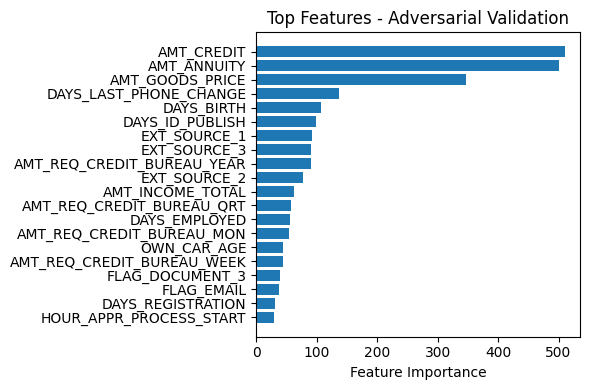

In [16]:
plot_feature_importance(clf, feature_names)

`AMT_CREDIT` seems to have another distribution in the test data.

In [17]:
def print_missing_share(train_df, test_df, column):
    """
    Prints the share of missing values for a specified column in train and test datasets.

    Args:
        train_df (pd.DataFrame): Training dataset.
        test_df (pd.DataFrame): Test dataset.
        column (str): Column name to check for missing values.
    """
    train_missing = train_df[column].isna().mean()
    test_missing = test_df[column].isna().mean()

    print(f"Train missing ({column}): {train_missing:.4f}")
    print(f"Test missing  ({column}): {test_missing:.4f}")

In [18]:
print_missing_share(application_train, application_test, "AMT_CREDIT")

Train missing (AMT_CREDIT): 0.0000
Test missing  (AMT_CREDIT): 0.0000


It cannot be due to the missing values.

In [19]:
def comparison_feature_distribution(train_df, test_df, column):
    """
    Plots KDE distributions of a given feature column from train and test datasets.

    Args:
        train_df (pd.DataFrame): Training dataset.
        test_df (pd.DataFrame): Test dataset.
        column (str): Feature column to plot.
    """
    sns.kdeplot(train_df[column], label="Train", fill=True)
    sns.kdeplot(test_df[column], label="Test", fill=True)
    plt.title(f"Distribution of {column} in Train vs. Test")
    plt.xlabel(column)
    plt.legend()
    plt.show()

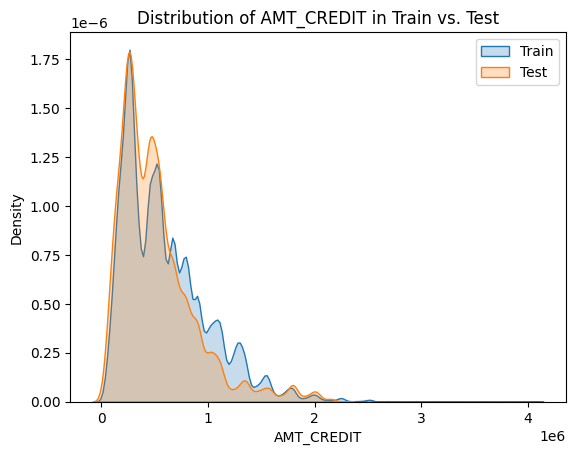

In [20]:
comparison_feature_distribution(application_train, application_test, "AMT_CREDIT")

Test data amount of AMT_CREDIT seems to be smaller:

In [21]:
print(application_train["AMT_CREDIT"].mean())
print(application_test["AMT_CREDIT"].mean())

599025.9997057016
516740.43556129985


In [22]:
print_missing_share(application_train, application_test, "AMT_ANNUITY")

Train missing (AMT_ANNUITY): 0.0000
Test missing  (AMT_ANNUITY): 0.0005


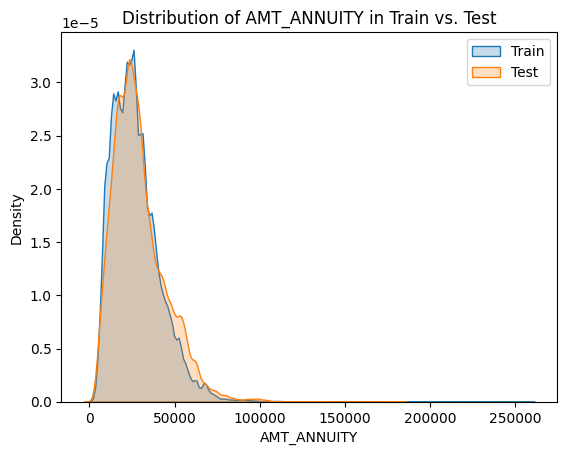

In [23]:
comparison_feature_distribution(application_train, application_test, "AMT_ANNUITY")

In [24]:
print(application_train["AMT_ANNUITY"].mean())
print(application_test["AMT_ANNUITY"].mean())

27108.573909183444
29426.240209359607


In [25]:
print_missing_share(application_train, application_test, "AMT_GOODS_PRICE")

Train missing (AMT_GOODS_PRICE): 0.0009
Test missing  (AMT_GOODS_PRICE): 0.0000


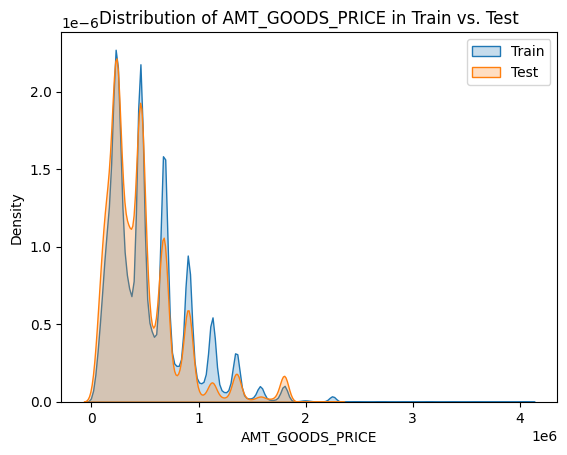

In [26]:
comparison_feature_distribution(application_train, application_test, "AMT_GOODS_PRICE")

In [27]:
print(application_train["AMT_GOODS_PRICE"].mean())
print(application_test["AMT_GOODS_PRICE"].mean())

538396.2074288895
462618.84047267353


In [28]:
print_missing_share(application_train, application_test, "DAYS_BIRTH")

Train missing (DAYS_BIRTH): 0.0000
Test missing  (DAYS_BIRTH): 0.0000


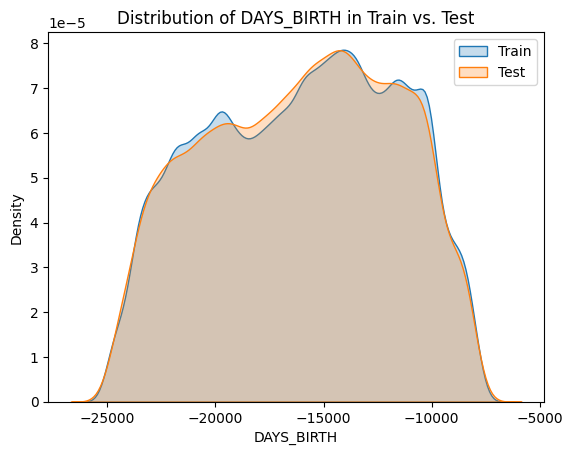

In [29]:
comparison_feature_distribution(application_train, application_test, "DAYS_BIRTH")

In [30]:
print(application_train["DAYS_BIRTH"].mean())
print(application_test["DAYS_BIRTH"].mean())

-16036.995066843137
-16068.084605284754


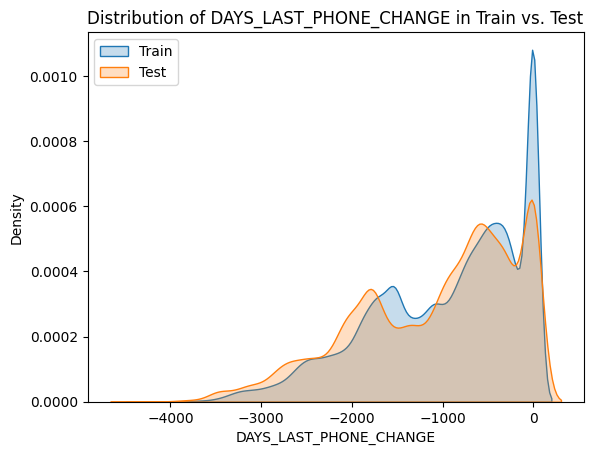

In [31]:
comparison_feature_distribution(
    application_train, application_test, "DAYS_LAST_PHONE_CHANGE"
)

## 4. <a id='toc4_'></a>[Exploratory Data Analysis (EDA)](#toc0_)

Before analysing the data, the data cleansing process must deal with setting the data type, handling missing values, deduplicating samples and characteristics and identifying and processing outliers.

### 4.1. <a id='toc4_1_'></a>[Data overview](#toc0_)

The data is relational, structured like a database. The Main base is the application/loan data, and there are multiple secondary tables:

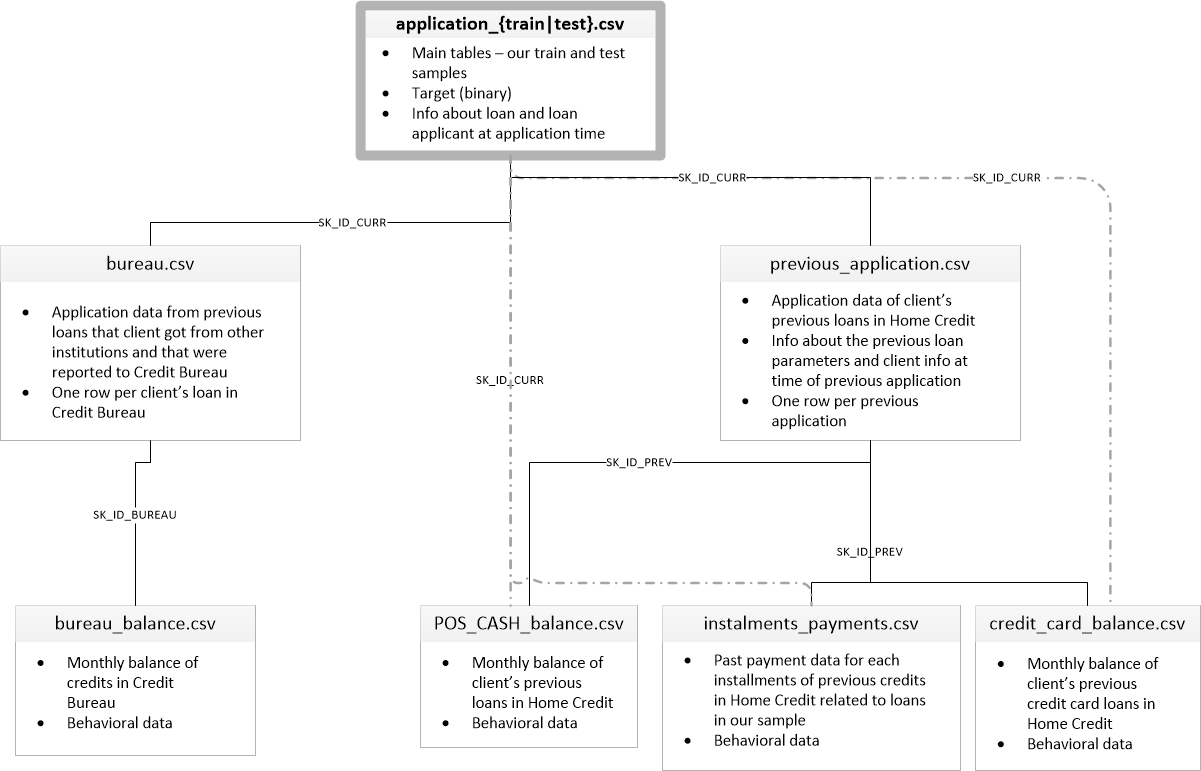

**Main base: Application/loan data**

In [32]:
application_train.shape

(307511, 122)

The training data consists of 307,511 loans.

`SK_ID_CURR` is the unique identifier per loan.

`TARGET` represents the target feature that describes if (=1) a client had payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample.

120 features describe the background of the loanee, the real estate, and loan application process.

Exact description of each feature can be derived here:

In [33]:
feature_description[feature_description.Table == "application_{train|test}.csv"]

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...
120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


For example the description of feature `DAYS_ID_PUBLISH`:

In [34]:
pd.set_option("display.max_colwidth", 200)
feature_description[feature_description.Row == "DAYS_ID_PUBLISH"].Description

23    How many days before the application did client change the identity document with which he applied for the loan
Name: Description, dtype: object

**Secondary datasets:**


All six secondary datasets are described further below during the aggregation process.

### 4.2. <a id='toc4_2_'></a>[application_train](#toc0_)

In [35]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Description of features and interpretation/notes:

| Column                                         | Description                                                                         | Interpretation / Notes                               |
| ---------------------------------------------- | ----------------------------------------------------------------------------------- | ---------------------------------------------------- |
| `SK_ID_CURR`                                   | ID of loan application                                                              | Unique ID for each client                            |
| `TARGET`                                       | 1 = client defaulted on loan, 0 = repaid                                            | Binary target variable                               |
| **Client Personal Information**                |                                                                                     |                                                      |
| `NAME_CONTRACT_TYPE`                           | Contract type (Cash loans, Revolving loans)                                         | Binary/categorical feature                           |
| `CODE_GENDER`                                  | Gender of client                                                                    | Categorical: 'M', 'F', 'XNA'                         |
| `FLAG_OWN_CAR`                                 | Does client own a car (`Y`/`N`)                                                     | Useful for wealth estimation                         |
| `FLAG_OWN_REALTY`                              | Does client own real estate                                                         | Proxy for financial stability                        |
| `CNT_CHILDREN`                                 | Number of children                                                                  | Continuous/numeric feature                           |
| `AMT_INCOME_TOTAL`                             | Annual income                                                                       | Key numeric feature                                  |
| `AMT_CREDIT`                                   | Loan amount applied for                                                             | Critical for risk modeling                           |
| `AMT_ANNUITY`                                  | Loan annuity                                                                        | Monthly payment                                      |
| `AMT_GOODS_PRICE`                              | For what amount goods were bought                                                   | Often equals or close to `AMT_CREDIT`                |
| `NAME_TYPE_SUITE`                              | Who was accompanying the client during application (e.g. alone, family)             | Social context feature                               |
| `NAME_INCOME_TYPE`                             | Source of income (e.g. working, pensioner, student)                                 | Strong predictive feature                            |
| `NAME_EDUCATION_TYPE`                          | Education level                                                                     | Used to infer credit literacy                        |
| `NAME_FAMILY_STATUS`                           | Family status                                                                       | Used to estimate responsibilities / stability        |
| `NAME_HOUSING_TYPE`                            | Housing situation (e.g. own apartment, with parents)                                | Economic indicator                                   |
| `REGION_POPULATION_RELATIVE`                   | Population of client’s region as a share of country population                      | Lower values = less populated area                   |
| `DAYS_BIRTH`                                   | Client’s age (in days, negative)                                                    | Use `(-DAYS_BIRTH / 365)` to get age in years        |
| `DAYS_EMPLOYED`                                | How many days client has been employed (negative; very large positive = unemployed) | Clean extreme outliers (365243 = unknown/unemployed) |
| `DAYS_REGISTRATION`                            | How long client has been registered at current address                              | Negative number, larger = longer stay                |
| `DAYS_ID_PUBLISH`                              | How long ago ID was issued                                                          | Indicator of ID reliability                          |
| `OWN_CAR_AGE`                                  | Age of client’s car (if owns one)                                                   | Useful when combined with `FLAG_OWN_CAR`             |
| `FLAG_MOBIL`                                   | Always 1 — can be dropped                                                           | Not informative                                      |
| `FLAG_EMP_PHONE`                               | Has work phone                                                                      | Categorical binary feature                           |
| `FLAG_WORK_PHONE`                              | Has work phone                                                                      | Can be merged with `FLAG_EMP_PHONE`                  |
| `FLAG_PHONE`                                   | Has phone                                                                           | Generic feature                                      |
| `FLAG_EMAIL`                                   | Has email                                                                           | Digital access indicator                             |
| `OCCUPATION_TYPE`                              | Job type                                                                            | Missing for many clients                             |
| `CNT_FAM_MEMBERS`                              | Number of family members                                                            | Used for deriving ratios (e.g. income per person)    |
| **Location & Region Features**                 |                                                                                     |                                                      |
| `REGION_RATING_CLIENT`                         | Rating of the client’s region                                                       | From 1 (worst) to 3 (best)                           |
| `REGION_RATING_CLIENT_W_CITY`                  | Rating including city context                                                       | More localized version                               |
| `WEEKDAY_APPR_PROCESS_START`                   | Day of the week when application was submitted                                      | Can be used to detect automated submissions          |
| `HOUR_APPR_PROCESS_START`                      | Hour of application submission                                                      | Behavioral indicator                                 |
| `REG_REGION_NOT_LIVE_REGION`                   | Flag: client’s region is not where they currently live                              | Binary                                               |
| `REG_REGION_NOT_WORK_REGION`                   | Flag: client’s region is not where they work                                        | Binary                                               |
| `LIVE_REGION_NOT_WORK_REGION`                  | Flag: client does not work in their living region                                   | Binary                                               |
| `REG_CITY_NOT_LIVE_CITY`                       | Flag: client does not live in registered city                                       | Binary                                               |
| `REG_CITY_NOT_WORK_CITY`                       | Flag: client does not work in registered city                                       | Binary                                               |
| `LIVE_CITY_NOT_WORK_CITY`                      | Flag: client does not work in living city                                           | Binary                                               |
| **Aggregated features about building of the client**                    |                                                                                     |                                                      |
| e.g. `APARTMENTS_AVG`, `APARTMENTS_MODE`, `APARTMENTS_MEDI`                      | Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized                                           | Numeric, highly correlated                                               |
| **Document Flags (binary)**                    |                                                                                     |                                                      |
| `FLAG_DOCUMENT_2` to `FLAG_DOCUMENT_21`        | Whether client submitted certain documents                                          | Mostly sparse — can drop or aggregate                |
| **External Scores**                            |                                                                                     |                                                      |
| `EXT_SOURCE_1`                                 | External score 1                                                                    | Higher = less risky; contains NaNs                   |
| `EXT_SOURCE_2`                                 | External score 2                                                                    | Strong predictor                                     |
| `EXT_SOURCE_3`                                 | External score 3                                                                    | Strong predictor                                     |
| **Credit bureau inquiries**                    |                                                                                     |                                                      |
| `AMT_REQ_CREDIT_BUREAU_HOUR`                   | Number of credit bureau inquiries 1 hour before application                         | Rarely non-zero; may indicate very recent financial activity |
| `AMT_REQ_CREDIT_BUREAU_DAY`                    | Number of inquiries 1 day before application (excluding the last hour)              | Suggests recent activity or urgent credit demand     |
| `AMT_REQ_CREDIT_BUREAU_WEEK`                   | Number of inquiries 1 week before application (excluding the last day)              | Reflects short-term credit-seeking behavior          |
| `AMT_REQ_CREDIT_BUREAU_MON`                    | Number of inquiries 1 month before application (excluding the last week)            | Often used in credit scoring to assess borrower behavior |
| `AMT_REQ_CREDIT_BUREAU_QRT`                    | Number of inquiries 3 months before application (excluding the last month)          | May be relevant for detecting frequent applications  |
| `AMT_REQ_CREDIT_BUREAU_YEAR`                   | Number of inquiries 1 year before application (excluding the last 3 months)         | Captures longer-term credit activity history         |



 

#### 4.2.1. <a id='toc4_2_1_'></a>[Features from Main Table: Descriptive Statistics, Relationship with Target(s) & Outliers, Encoding](#toc0_)

Identifying outliers in the data by using data visualization techniques to inspect the data’s distribution and verify the presence of outliers. Moreover, a two-level approach is applied to check both types of outliers, *natural* and *anomalous*: the rule-based method and the statistical approach. 

**Rule-based method**

Error-related outlier (anomalies) can be identified by comparing the valid value ranges (e.g. given in the feature descriptions) with the min-max values of the given dataset. Valid value ranges were not explicitely provided in the meta data, therefore additional research, common sense and logical reasoning had to be applied. 

The rule-based method to indicate outliers is done simultaneously with the statistical outliers approach. The boxplots provide a clear picture if datapoints are breaking the particular rule applied to a feature (e.g. unreasonable years of age). In such cases, further analysis is performed and data more thoroughly described (e.g. with a feature summary).

As next, the features are visualized (via boxplot and barcharts) to detect possible outliers. Simultaneously the most extensively used procedure for outlier detection, the Inter Quartile Range (IQR) method is used to calculate and identify these outliers. 

##### 4.2.1.1. <a id='toc4_2_1_1_'></a>[Loan default risk (TARGET)](#toc0_)

In [36]:
summarize_categorical_feature(application_train, "TARGET")

,Count,Share (%)
TARGET,,
0,282686,91.93
1,24825,8.07


There is a major imbalance in the data regarding the target. Only 8% of clients had payment difficulties.

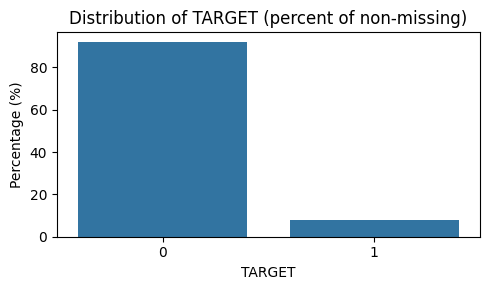

In [37]:
plot_feature_distribution(application_train, "TARGET")

##### 4.2.1.2. <a id='toc4_2_1_2_'></a>[NAME_CONTRACT_TYPE](#toc0_)

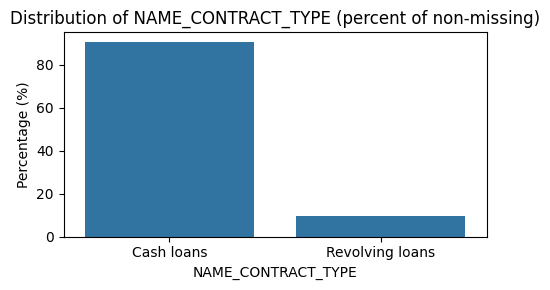

In [38]:
plot_feature_distribution(application_train, "NAME_CONTRACT_TYPE")

<Figure size 500x300 with 0 Axes>

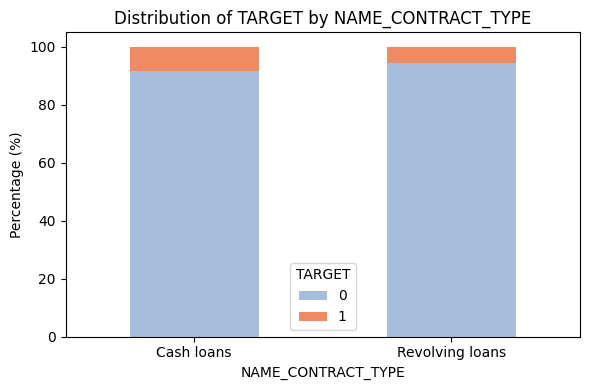

In [39]:
plot_feature_distribution(
    application_train,
    "NAME_CONTRACT_TYPE",
    target_name="TARGET",
    stacked_target_split=True,
)

##### 4.2.1.3. <a id='toc4_2_1_3_'></a>[CODE_GENDER](#toc0_)

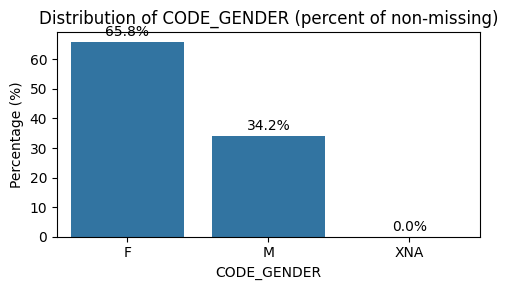

In [40]:
plot_feature_distribution(application_train, "CODE_GENDER", annotate=True)

The gender category "XNA" occurs extremely rarely and will therefore be excluded from the dataset.

In [41]:
def remove_invalid_gender(df):
    removed = (df["CODE_GENDER"] == "XNA").sum()
    return df[df["CODE_GENDER"] != "XNA"]

In [42]:
remove_invalid_gender(application_train)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 500x300 with 0 Axes>

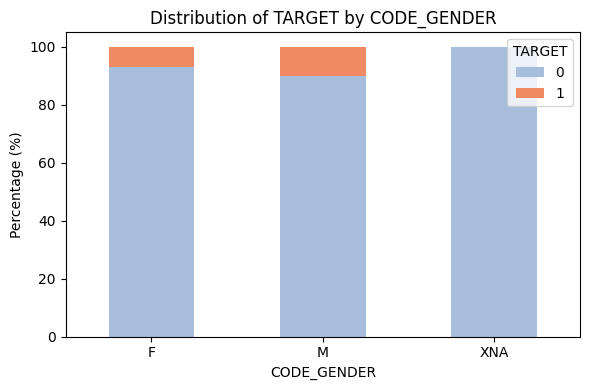

In [43]:
plot_feature_distribution(
    application_train, "CODE_GENDER", target_name="TARGET", stacked_target_split=True
)

##### 4.2.1.4. <a id='toc4_2_1_4_'></a>[DAYS_BIRTH - AGE](#toc0_)

In [44]:
def age_from_days_birth(df, days_birth_col="DAYS_BIRTH", new_col_name="AGE"):
    """
    Adds a new column with age in years and drops the original DAYS_BIRTH column.

    This function handles a common feature engineering task where a more
    interpretable feature (AGE) is created from a less intuitive one (DAYS_BIRTH).

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the DAYS_BIRTH column.
    - days_birth_col (str): The name of the column with days before current date.
    - new_col_name (str): The name of the new column to store the age in years.

    Returns:
    - pd.DataFrame: The DataFrame with the new AGE column and the
                    original DAYS_BIRTH column removed.
    """
    df[new_col_name] = (-df[days_birth_col]) // 365

    df = df.drop(columns=[days_birth_col], errors="ignore")

    return df

In [45]:
application_train = age_from_days_birth(application_train)

In [46]:
application_train.AGE.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

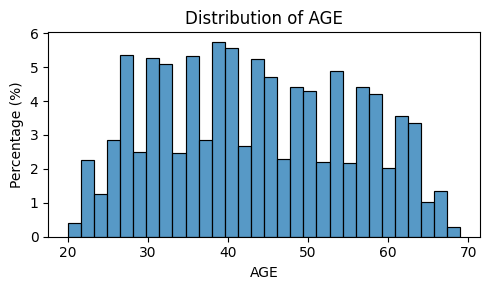

In [47]:
plot_feature_distribution(application_train, "AGE")

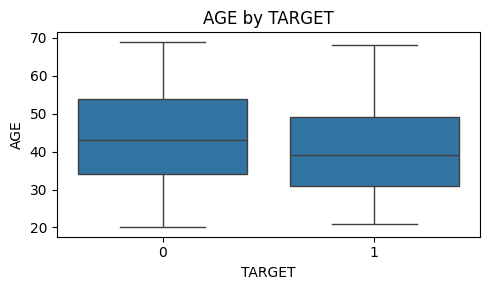

In [48]:
plot_feature_distribution(application_train, "AGE", target_name="TARGET")

##### 4.2.1.5. <a id='toc4_2_1_5_'></a>[FLAG_OWN_CAR](#toc0_)

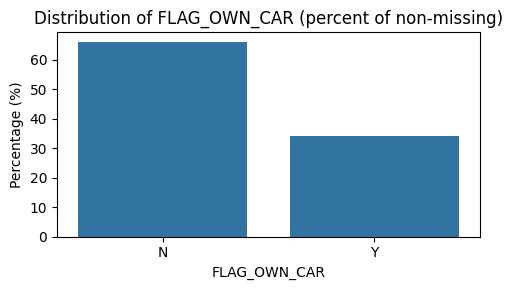

In [49]:
plot_feature_distribution(application_train, "FLAG_OWN_CAR")

Better to encode binary feature `FLAG_OWN_CAR`:

In [50]:
def convert_yn_to_bool(df, column):
    """
    Converts a column with 'Y'/'N' values to boolean True/False.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column (str): Name of the column to convert.

    Returns:
        pd.DataFrame: The modified DataFrame.
    """
    df = df.copy()
    df[column] = df[column].map({"Y": True, "N": False})
    return df

In [51]:
convert_yn_to_bool(application_train, "FLAG_OWN_CAR")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,False,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,False,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,True,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,False,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,M,False,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,False,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,25
307507,456252,0,Cash loans,F,False,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,56
307508,456253,0,Cash loans,F,False,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,41
307509,456254,1,Cash loans,F,False,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,32


<Figure size 500x300 with 0 Axes>

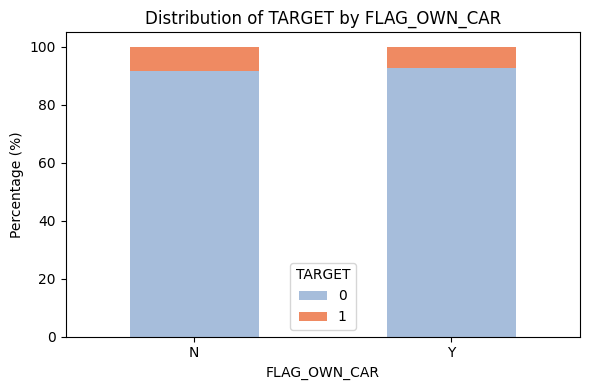

In [52]:
plot_feature_distribution(
    application_train, "FLAG_OWN_CAR", target_name="TARGET", stacked_target_split=True
)

##### 4.2.1.6. <a id='toc4_2_1_6_'></a>[FLAG_OWN_REALTY](#toc0_)

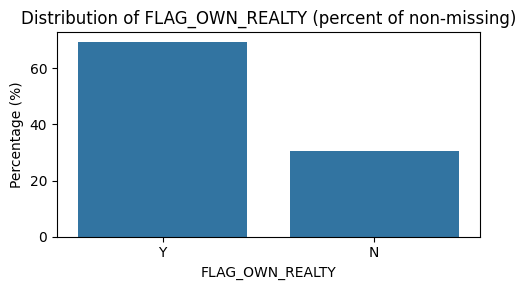

In [53]:
plot_feature_distribution(application_train, "FLAG_OWN_REALTY")

In [54]:
convert_yn_to_bool(application_train, "FLAG_OWN_REALTY")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,True,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,False,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,True,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,True,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,M,N,True,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,False,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,25
307507,456252,0,Cash loans,F,N,True,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,56
307508,456253,0,Cash loans,F,N,True,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,41
307509,456254,1,Cash loans,F,N,True,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,32


<Figure size 500x300 with 0 Axes>

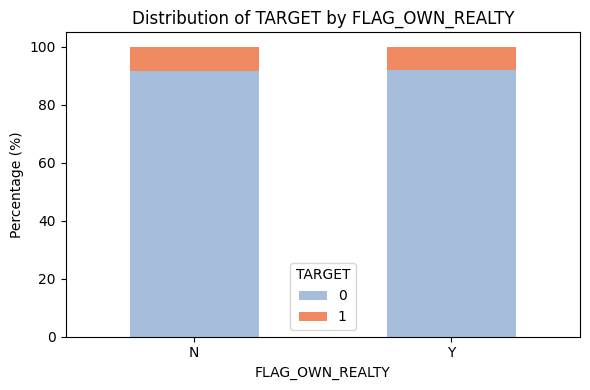

In [55]:
plot_feature_distribution(
    application_train,
    "FLAG_OWN_REALTY",
    target_name="TARGET",
    stacked_target_split=True,
)

##### 4.2.1.7. <a id='toc4_2_1_7_'></a>[CNT_CHILDREN](#toc0_)

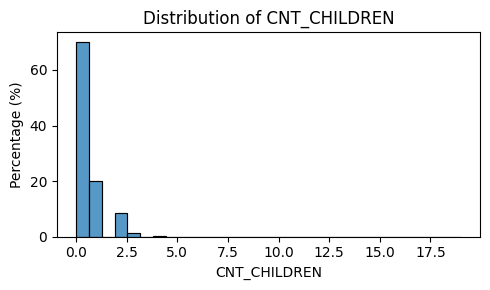

In [56]:
plot_feature_distribution(application_train, "CNT_CHILDREN")

In [57]:
application_train.CNT_CHILDREN.value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [58]:
def bin_upper_threshold(df, source_col, target_col, threshold, drop_original=False):
    """
    Bins the number of entities into categories, grouping all values >= threshold into 'X+',
    converts to categorical, and optionally drops the original column.

    Parameters:
        df (pd.DataFrame): The DataFrame to transform.
        source_col (str): Name of the column with the number of entities.
        target_col (str): Name of the new categorical column.
        threshold (int): All values >= threshold will be grouped into 'threshold+'.
        drop_original (bool): Whether to drop the original column.

    Returns:
        pd.DataFrame: The modified DataFrame (optional, depending on your workflow).
    """
    df[target_col] = (
        df[source_col]
        .apply(lambda x: str(x) if x < threshold else f"{threshold}+")
        .astype("category")
    )

    if drop_original:
        df.drop(columns=source_col, inplace=True)

    return df

In [59]:
application_train = bin_upper_threshold(
    application_train,
    source_col="CNT_CHILDREN",
    target_col="CNT_CHILDREN_CAT",
    threshold=3,
    drop_original=True,
)

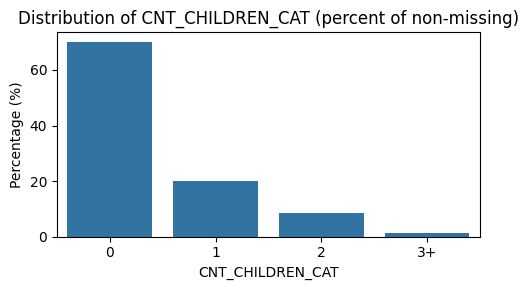

In [60]:
plot_feature_distribution(application_train, "CNT_CHILDREN_CAT")

<Figure size 500x300 with 0 Axes>

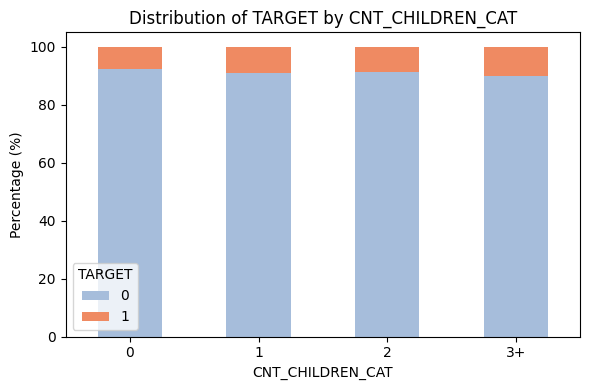

In [61]:
plot_feature_distribution(
    application_train,
    "CNT_CHILDREN_CAT",
    target_name="TARGET",
    stacked_target_split=True,
)

##### 4.2.1.8. <a id='toc4_2_1_8_'></a>[AMT_INCOME_TOTAL](#toc0_)

In [62]:
application_train.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

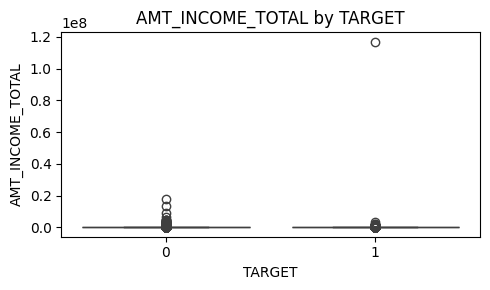

In [63]:
plot_feature_distribution(application_train, "AMT_INCOME_TOTAL", target_name="TARGET")

We want to remove the outliers with the highest income:

In [64]:
count_dropped = (application_train["AMT_INCOME_TOTAL"] > 0.5e7).sum()
application_train.drop(
    application_train[application_train["AMT_INCOME_TOTAL"] > 0.5e7].index, inplace=True
)
print(f"Dropped {count_dropped} rows where Income of the client > 5,000,000.")

Dropped 5 rows where Income of the client > 5,000,000.


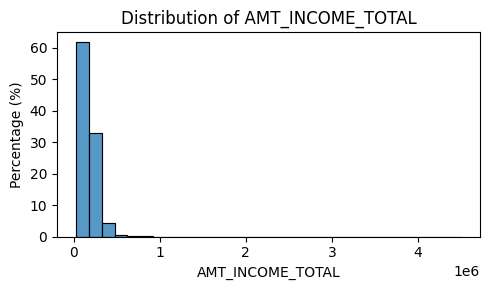

In [65]:
plot_feature_distribution(application_train, "AMT_INCOME_TOTAL")

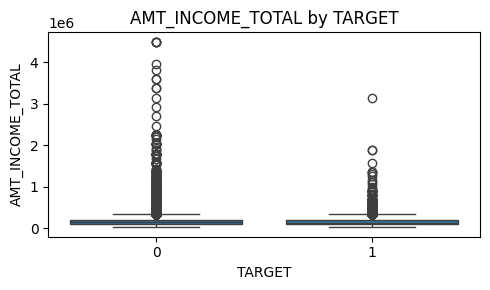

In [66]:
plot_feature_distribution(application_train, "AMT_INCOME_TOTAL", target_name="TARGET")

##### 4.2.1.9. <a id='toc4_2_1_9_'></a>[AMT_CREDIT](#toc0_)

In [67]:
application_train.AMT_CREDIT.describe()

count    3.075060e+05
mean     5.990199e+05
std      4.024885e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

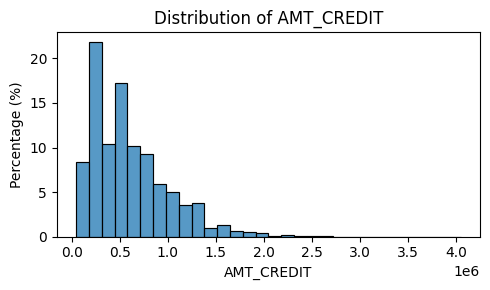

In [68]:
plot_feature_distribution(application_train, "AMT_CREDIT")

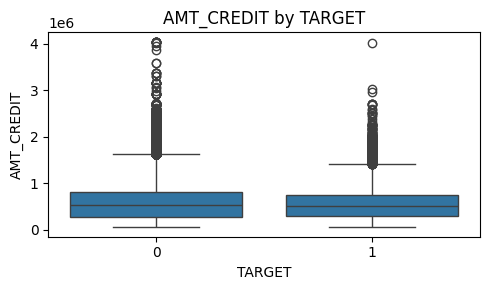

In [69]:
plot_feature_distribution(application_train, "AMT_CREDIT", target_name="TARGET")

##### 4.2.1.10. <a id='toc4_2_1_10_'></a>[AMT_ANNUITY](#toc0_)

In [70]:
application_train.AMT_ANNUITY.describe()

count    307494.000000
mean      27107.674794
std       14491.121862
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

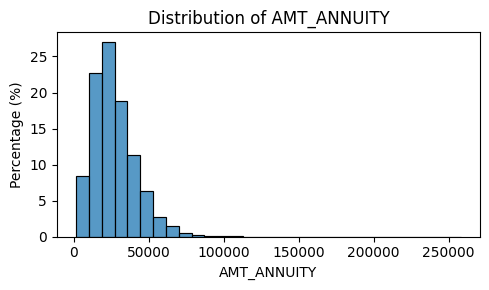

In [71]:
plot_feature_distribution(application_train, "AMT_ANNUITY")

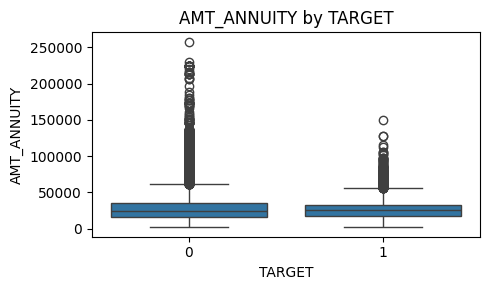

In [72]:
plot_feature_distribution(application_train, "AMT_ANNUITY", target_name="TARGET")

We want to add the interaction Debt-to-Income Ratio (DTI) reflects how much of a person's income goes toward paying the loan annually — a lower DTI indicates better ability to repay:

In [73]:
def add_dti(df):
    """
    Adds a column 'DEBT_TO_INCOME_RATIO' to the DataFrame,
    calculated as AMT_ANNUITY / AMT_INCOME_TOTAL.
    Values where income is zero are set to NaN.

    Parameters:
    df (pd.DataFrame): The input DataFrame with 'AMT_ANNUITY' and 'AMT_INCOME_TOTAL'

    Returns:
    pd.DataFrame: The same DataFrame with an additional 'DEBT_TO_INCOME_RATIO' column
    """
    df["DEBT_TO_INCOME_RATIO"] = df["AMT_ANNUITY"] / df["AMT_INCOME_TOTAL"]
    df.loc[df["AMT_INCOME_TOTAL"] == 0, "DEBT_TO_INCOME_RATIO"] = np.nan
    return df

In [74]:
application_train = add_dti(application_train)

In [75]:
application_train["DEBT_TO_INCOME_RATIO"].describe()

count    307494.000000
mean          0.180933
std           0.094572
min           0.003333
25%           0.114785
50%           0.162833
75%           0.229067
max           1.875965
Name: DEBT_TO_INCOME_RATIO, dtype: float64

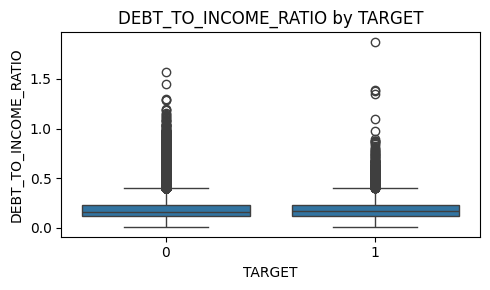

In [76]:
plot_feature_distribution(
    application_train, "DEBT_TO_INCOME_RATIO", target_name="TARGET"
)

##### 4.2.1.11. <a id='toc4_2_1_11_'></a>[AMT_GOODS_PRICE](#toc0_)

In [77]:
application_train.AMT_GOODS_PRICE.describe()

count    3.072280e+05
mean     5.383902e+05
std      3.694431e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

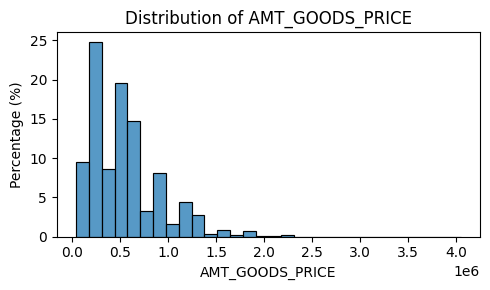

In [78]:
plot_feature_distribution(application_train, "AMT_GOODS_PRICE")

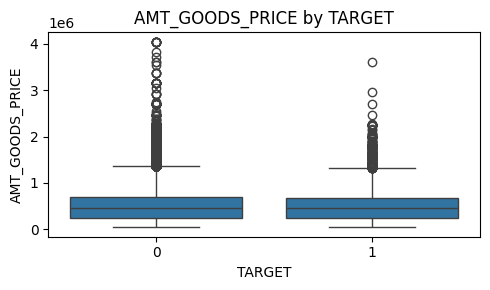

In [79]:
plot_feature_distribution(application_train, "AMT_GOODS_PRICE", target_name="TARGET")

We want to flag the special cases where the total credit exceeds the price of the good on loan:

In [80]:
def flag_inconsistent_credit_cases(df):
    """
    Adds a column 'FLAG_GOODS_GT_CREDIT' to the DataFrame,
    which flags cases where AMT_GOODS_PRICE < AMT_CREDIT.
    Prints the number and percentage of such cases.

    Parameters:
    df (pd.DataFrame): The input DataFrame with columns 'AMT_GOODS_PRICE' and 'AMT_CREDIT'

    Returns:
    pd.DataFrame: The same DataFrame with an additional boolean column 'FLAG_GOODS_GT_CREDIT'
    """
    df["FLAG_GOODS_GT_CREDIT"] = df["AMT_GOODS_PRICE"] < df["AMT_CREDIT"]

    return df

In [81]:
application_train = flag_inconsistent_credit_cases(application_train)

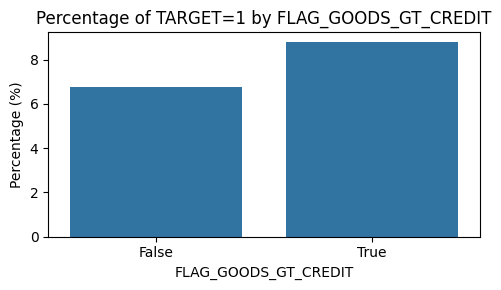

In [82]:
plot_feature_distribution(
    application_train, "FLAG_GOODS_GT_CREDIT", target_name="TARGET"
)

Interesting that the majority of cases have a higher credit loan than the actual goods price. This means that probably the credit amount may include:

- Interest-related fees

- Loan insurance

- Administrative costs

- Down-payment coverage

- Extra cash requested by the applicant



##### 4.2.1.12. <a id='toc4_2_1_12_'></a>[NAME_TYPE_SUITE](#toc0_)

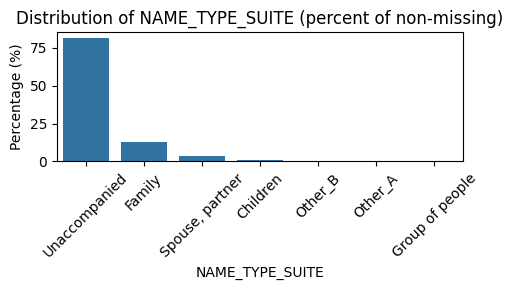

In [83]:
plot_feature_distribution(application_train, "NAME_TYPE_SUITE", x_axis_rotation=45)

In [84]:
application_train.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      248521
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

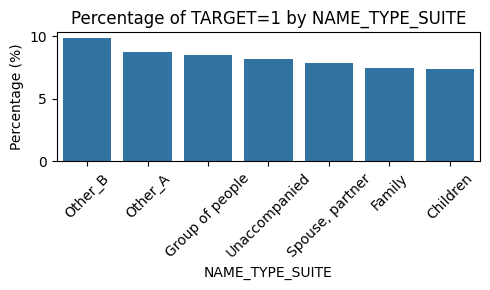

In [85]:
plot_feature_distribution(
    application_train, "NAME_TYPE_SUITE", target_name="TARGET", x_axis_rotation=45
)

##### 4.2.1.13. <a id='toc4_2_1_13_'></a>[NAME_INCOME_TYPE](#toc0_)

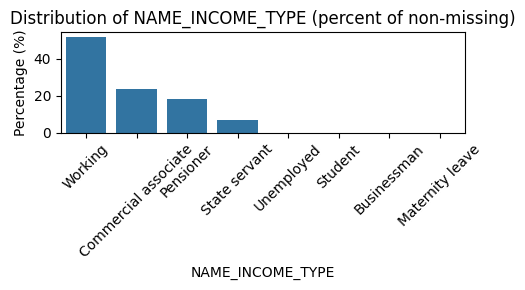

In [86]:
plot_feature_distribution(application_train, "NAME_INCOME_TYPE", x_axis_rotation=45)

In [87]:
application_train.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158771
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

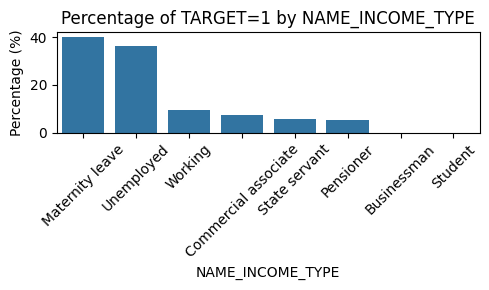

In [88]:
plot_feature_distribution(
    application_train, "NAME_INCOME_TYPE", target_name="TARGET", x_axis_rotation=45
)

The income types "Maternity leave", "Unemployed", "Businessman" and "Student" are represented in only a few cases, however, their relation to the target is unique. Therefore we do not drop or group them but let them stand alone, despite the risk of overfitting.

##### 4.2.1.14. <a id='toc4_2_1_14_'></a>[NAME_EDUCATION_TYPE](#toc0_)

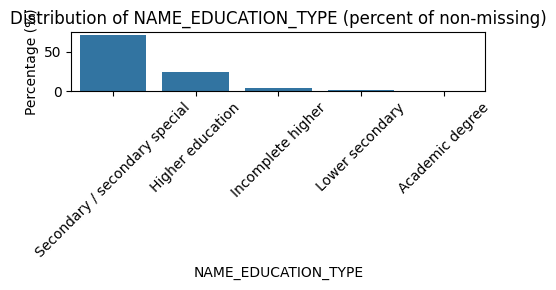

In [89]:
plot_feature_distribution(application_train, "NAME_EDUCATION_TYPE", x_axis_rotation=45)

In [90]:
application_train.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218389
Higher education                  74860
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

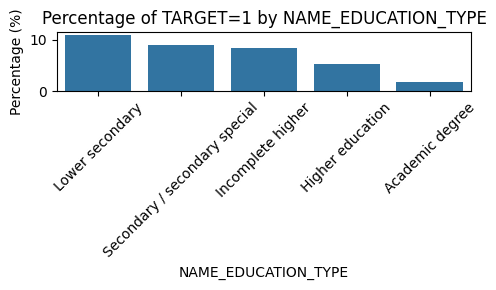

In [91]:
plot_feature_distribution(
    application_train, "NAME_EDUCATION_TYPE", target_name="TARGET", x_axis_rotation=45
)

Since Academic degree is essentially a higher education, we regroup these cases:

In [92]:
# application_train = merge_academic_degree_into_higher(application_train)

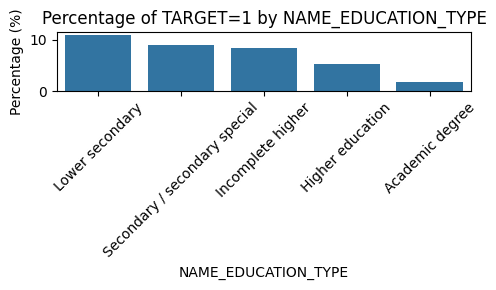

In [93]:
plot_feature_distribution(
    application_train, "NAME_EDUCATION_TYPE", target_name="TARGET", x_axis_rotation=45
)

There is a clear order reflected in the education ladder and the target. 

Interesting is also the clear order reflected in the education ladder when looking at the average income per group:

In [94]:
application_train.groupby("NAME_EDUCATION_TYPE")[
    "AMT_INCOME_TOTAL"
].mean().sort_values()

NAME_EDUCATION_TYPE
Lower secondary                  130079.358491
Secondary / secondary special    154541.769660
Incomplete higher                181563.812397
Higher education                 208269.686144
Academic degree                  240009.146341
Name: AMT_INCOME_TOTAL, dtype: float64

Therefore we want to use a new feature `EDUCATION_LEVEL` which reflects this order:

In [95]:
application_train = encode_education_level(application_train)

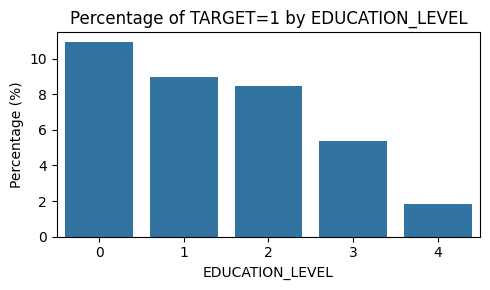

In [96]:
plot_feature_distribution(application_train, "EDUCATION_LEVEL", target_name="TARGET")

##### 4.2.1.15. <a id='toc4_2_1_15_'></a>[NAME_FAMILY_STATUS](#toc0_)

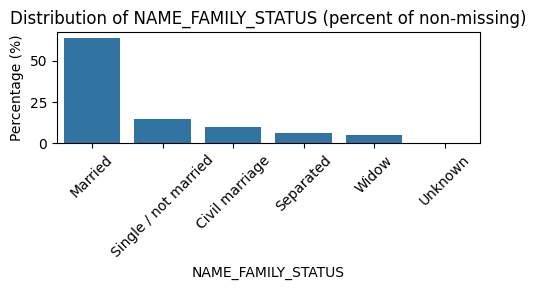

In [97]:
plot_feature_distribution(application_train, "NAME_FAMILY_STATUS", x_axis_rotation=45)

In [98]:
application_train.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196428
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Lots of widows apply for a house loan...

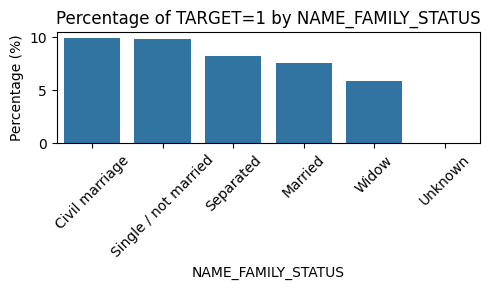

In [99]:
plot_feature_distribution(
    application_train, "NAME_FAMILY_STATUS", target_name="TARGET", x_axis_rotation=45
)

##### 4.2.1.16. <a id='toc4_2_1_16_'></a>[NAME_HOUSING_TYPE](#toc0_)

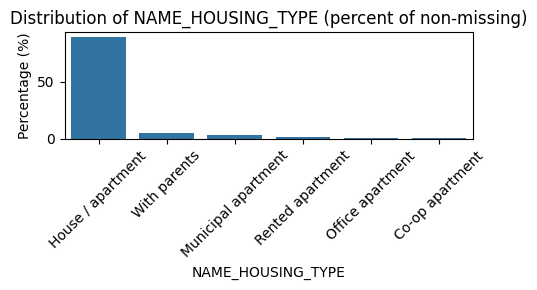

In [100]:
plot_feature_distribution(application_train, "NAME_HOUSING_TYPE", x_axis_rotation=45)

In [101]:
application_train.NAME_HOUSING_TYPE.value_counts()

NAME_HOUSING_TYPE
House / apartment      272863
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

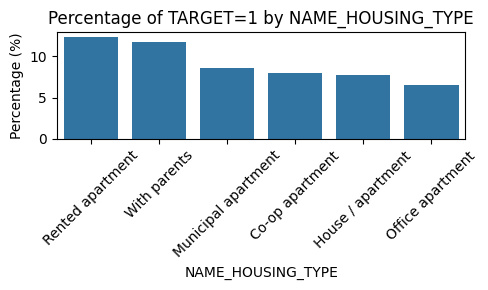

In [102]:
plot_feature_distribution(
    application_train, "NAME_HOUSING_TYPE", target_name="TARGET", x_axis_rotation=45
)

##### 4.2.1.17. <a id='toc4_2_1_17_'></a>[OCCUPATION_TYPE](#toc0_)

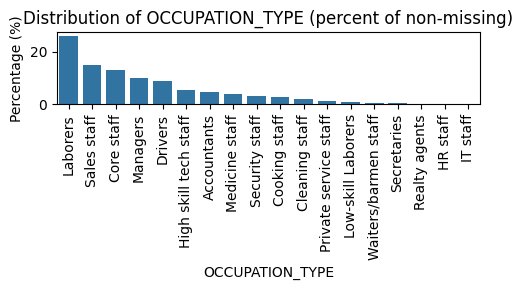

In [103]:
plot_feature_distribution(
    application_train, "OCCUPATION_TYPE", max_categories=20, x_axis_rotation=90
)

In [104]:
application_train.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55184
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

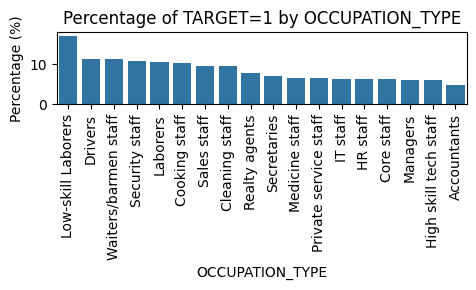

In [105]:
plot_feature_distribution(
    application_train,
    "OCCUPATION_TYPE",
    target_name="TARGET",
    max_categories=20,
    x_axis_rotation=90,
)

**Group by Cluster:**

In [106]:
occupation_income_rates = (
    application_train.groupby("OCCUPATION_TYPE")["AMT_INCOME_TOTAL"]
    .mean()
    .sort_values()
)
occupation_income_rates.describe()

count        18.000000
mean     172209.054956
std       32450.671053
min      130790.895551
25%      149674.432823
50%      168388.854573
75%      188440.113415
max      259927.712914
Name: AMT_INCOME_TOTAL, dtype: float64

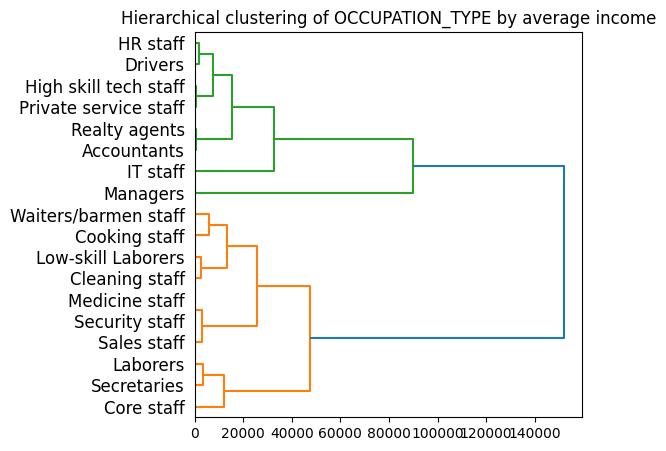

In [107]:
occupation_income_rates = occupation_income_rates.to_frame()

linked = linkage(occupation_income_rates, method="ward")

plt.figure(figsize=(5, 5))
dendrogram(linked, labels=occupation_income_rates.index.tolist(), orientation="right")
plt.title("Hierarchical clustering of OCCUPATION_TYPE by average income")
plt.show()

In [108]:
num_occupation_clusters = 4

occupation_cluster_labels = fcluster(
    linked, t=num_occupation_clusters, criterion="maxclust"
)
occupation_cluster_labels_cat = [
    f"Cluster_{label}" for label in occupation_cluster_labels
]

occupation_clusters = pd.DataFrame(
    {
        "OCCUPATION_TYPE": occupation_income_rates.index,
        "OCCUPATION_CLUSTER": occupation_cluster_labels_cat,
    }
)

application_train = application_train.merge(
    occupation_clusters, how="left", on="OCCUPATION_TYPE"
)

In [109]:
application_train.OCCUPATION_CLUSTER.value_counts()

OCCUPATION_CLUSTER
Cluster_1    84059
Cluster_2    61400
Cluster_3    44288
Cluster_4    21370
Name: count, dtype: int64

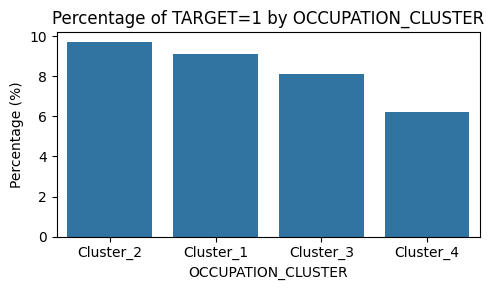

In [110]:
plot_feature_distribution(application_train, "OCCUPATION_CLUSTER", target_name="TARGET")

##### 4.2.1.18. <a id='toc4_2_1_18_'></a>[CNT_FAM_MEMBERS](#toc0_)

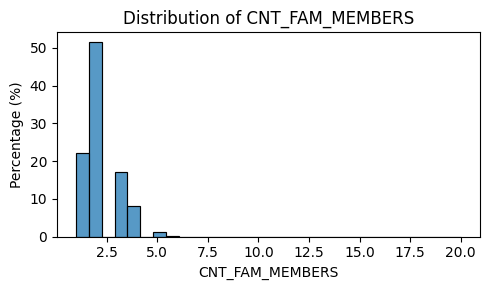

In [111]:
plot_feature_distribution(application_train, "CNT_FAM_MEMBERS")

In [112]:
application_train.CNT_FAM_MEMBERS.value_counts()

CNT_FAM_MEMBERS
2.0     158354
1.0      67847
3.0      52600
4.0      24696
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

In [113]:
application_train = bin_upper_threshold(
    application_train,
    source_col="CNT_FAM_MEMBERS",
    target_col="CNT_FAM_MEMBERS_CAT",
    threshold=6,
    drop_original=True,
)

c:\Users\JO-840-G5\Desktop\py4e\jwerne-DS.v2.5.3.4.1\src\utils.py:420: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = data.groupby(feature_name)[target_name].mean().mul(100)


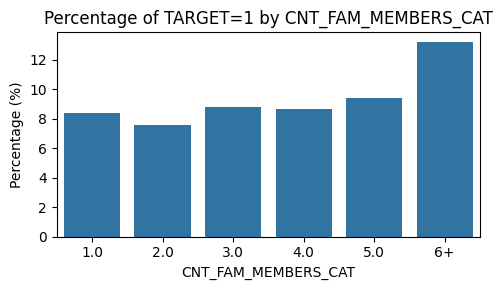

In [114]:
plot_feature_distribution(
    application_train, "CNT_FAM_MEMBERS_CAT", target_name="TARGET"
)

##### 4.2.1.19. <a id='toc4_2_1_19_'></a>[ORGANIZATION_TYPE](#toc0_)

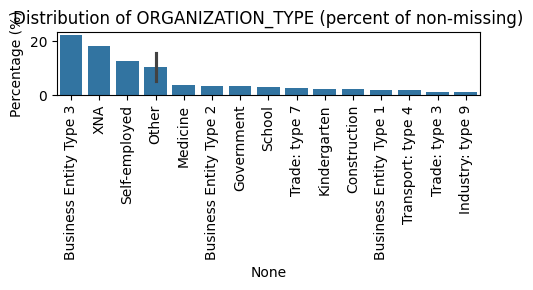

In [115]:
plot_feature_distribution(
    application_train, "ORGANIZATION_TYPE", max_categories=15, x_axis_rotation=90
)

In [116]:
application_train["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67989
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5397
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

**Group by Prefix:**

In [117]:
def group_by_prefix(org_type):
    if org_type.startswith("Trade:"):
        return "Trade"
    elif org_type.startswith("Industry:"):
        return "Industry"
    elif org_type.startswith("Transport:"):
        return "Transport"
    elif org_type.startswith("Business Entity"):
        return "Business Entity"
    else:
        return org_type

In [118]:
application_train["ORG_PREFIX_GROUP"] = application_train["ORGANIZATION_TYPE"].apply(
    group_by_prefix
)

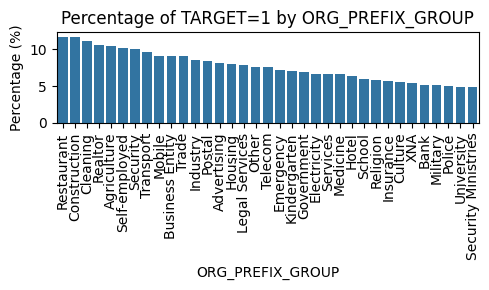

In [119]:
plot_feature_distribution(
    application_train,
    "ORG_PREFIX_GROUP",
    target_name="TARGET",
    max_categories=35,
    x_axis_rotation=90,
)

**Group by Cluster:**

In [120]:
org_income_rates = (
    application_train.groupby("ORGANIZATION_TYPE")["AMT_INCOME_TOTAL"]
    .mean()
    .sort_values()
)
org_income_rates.describe()

count        58.000000
mean     176986.922344
std       22109.887734
min      132651.582267
25%      163217.799370
50%      174357.591572
75%      188921.959510
max      249875.409836
Name: AMT_INCOME_TOTAL, dtype: float64

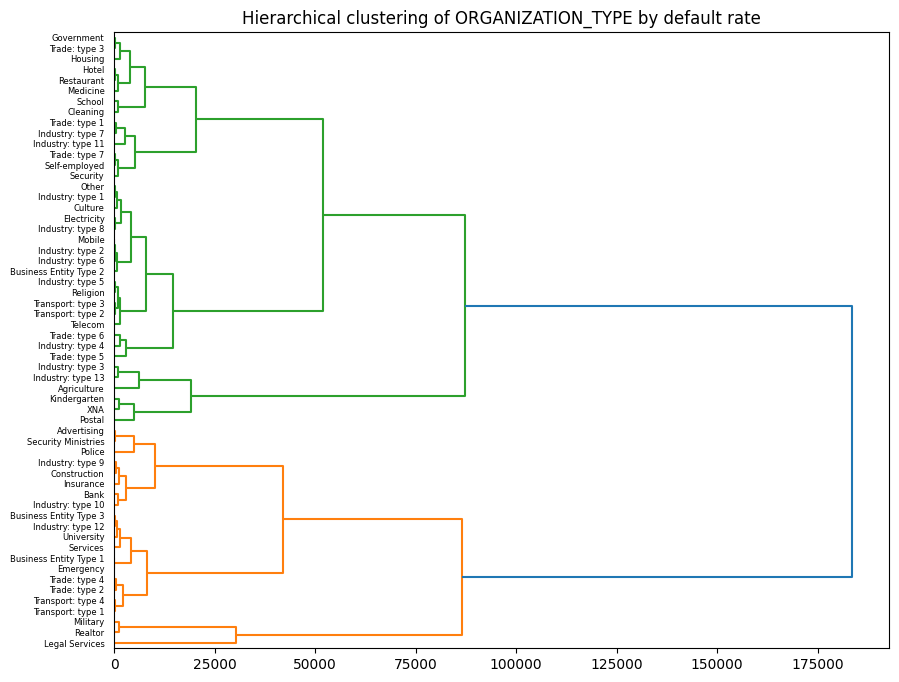

In [121]:
org_income_rates = org_income_rates.to_frame()

linked = linkage(org_income_rates, method="ward")

plt.figure(figsize=(10, 8))
dendrogram(linked, labels=org_income_rates.index.tolist(), orientation="right")
plt.title("Hierarchical clustering of ORGANIZATION_TYPE by default rate")
plt.show()

In [122]:
num_org_clusters = 5

org_cluster_labels = fcluster(linked, t=num_org_clusters, criterion="maxclust")
org_cluster_labels_cat = [f"Cluster_{label}" for label in org_cluster_labels]

org_clusters = pd.DataFrame(
    {
        "ORGANIZATION_TYPE": org_income_rates.index,
        "ORGANIZATION_CLUSTER": org_cluster_labels_cat,
    }
)

application_train = application_train.merge(
    org_clusters, how="left", on="ORGANIZATION_TYPE"
)

In [123]:
application_train.ORGANIZATION_CLUSTER.value_counts()

ORGANIZATION_CLUSTER
Cluster_2    103411
Cluster_5     93826
Cluster_3     70210
Cluster_4     36724
Cluster_1      3335
Name: count, dtype: int64

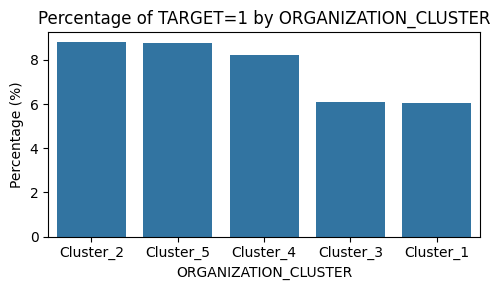

In [124]:
plot_feature_distribution(
    application_train, "ORGANIZATION_CLUSTER", target_name="TARGET"
)

##### 4.2.1.20. <a id='toc4_2_1_20_'></a>[Aggregated features](#toc0_)

Multiple features are aggregated, typically seen in the feature name ending with the type of aggregation: _MODE, _AVG (mean aggregation), _MEDI (median).

Typically they are highly correlated and two versions can be dropped. Which to drop depends on the data distribution:

- `MEDI` is often more robust to outliers.

- `AVG` may be useful if data is smooth and normal-like.

- `MODE` is rarely better than MEDI unless the distribution is very skewed and has repeated values.



##### 4.2.1.21. <a id='toc4_2_1_21_'></a>[LIVINGAREA](#toc0_)

Example of high correlation:

In [125]:
subset = application_train[["LIVINGAREA_MODE", "LIVINGAREA_AVG", "LIVINGAREA_MEDI"]]
subset.corr()

,LIVINGAREA_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI
LIVINGAREA_MODE,1.000000,0.972050,0.974743
LIVINGAREA_AVG,0.972050,1.000000,0.995596
LIVINGAREA_MEDI,0.974743,0.995596,1.000000


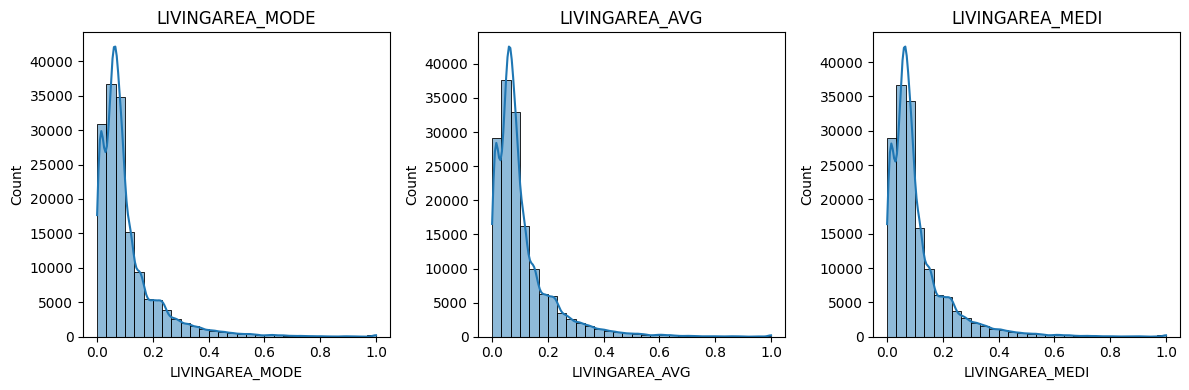

In [126]:
cols = ["LIVINGAREA_MODE", "LIVINGAREA_AVG", "LIVINGAREA_MEDI"]
plt.figure(figsize=(12, 4))

for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(application_train[col].dropna(), kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

All three show similar distributions and high correlation, thus we keep `MEDI`.

In [127]:
application_train.drop(columns=["LIVINGAREA_MODE", "LIVINGAREA_AVG"], inplace=True)

##### 4.2.1.22. <a id='toc4_2_1_22_'></a>[COMMONAREA](#toc0_)

In [128]:
subset = application_train[["COMMONAREA_MODE", "COMMONAREA_AVG", "COMMONAREA_MEDI"]]
subset.corr()

,COMMONAREA_MODE,COMMONAREA_AVG,COMMONAREA_MEDI
COMMONAREA_MODE,1.000000,0.977147,0.979887
COMMONAREA_AVG,0.977147,1.000000,0.995978
COMMONAREA_MEDI,0.979887,0.995978,1.000000


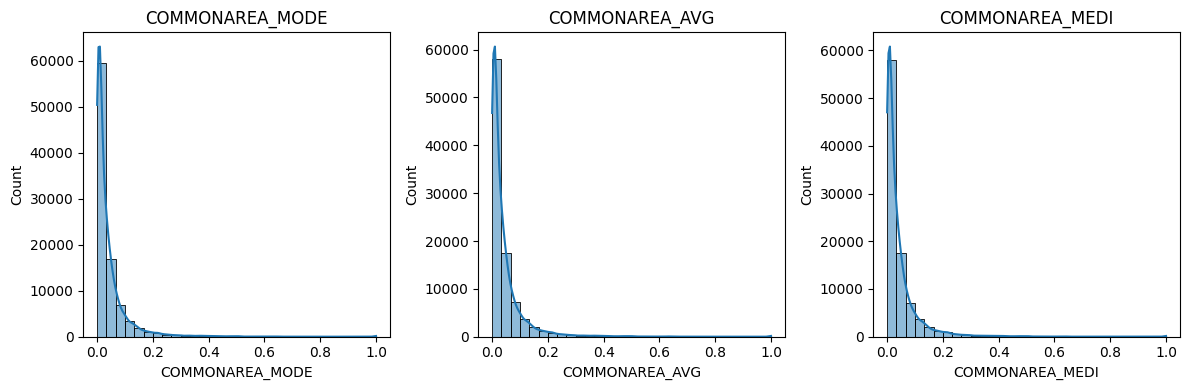

In [129]:
cols = ["COMMONAREA_MODE", "COMMONAREA_AVG", "COMMONAREA_MEDI"]
plt.figure(figsize=(12, 4))

for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(application_train[col].dropna(), kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

All three show similar distributions and high correlation, thus we keep `MEDI`.

In [130]:
application_train.drop(columns=["COMMONAREA_MODE", "COMMONAREA_AVG"], inplace=True)

##### 4.2.1.23. <a id='toc4_2_1_23_'></a>[Other aggregated features](#toc0_)

Keeping all three adds no new information and may introduce multicollinearity. Since these are all normalized versions of the same raw feature, aggregated over some group, the differences are marginal. It is safe to assume two can be dropped without major loss of information. We choose the most robust version, `MEDI` (median), always.

In [131]:
def drop_duplicate_avg_mode_features(df):
    cols_to_drop = [
        col
        for col in df.columns
        if (
            (col.endswith("_AVG") or col.endswith("_MODE"))
            and col.replace("_AVG", "_MEDI").replace("_MODE", "_MEDI") in df.columns
        )
    ]
    return df.drop(columns=cols_to_drop)

In [132]:
application_train = drop_duplicate_avg_mode_features(application_train)

##### 4.2.1.24. <a id='toc4_2_1_24_'></a>[Other aggregated features with only one aggregation type](#toc0_)

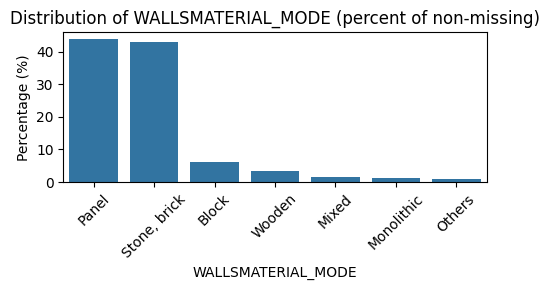

In [133]:
plot_feature_distribution(application_train, "WALLSMATERIAL_MODE", x_axis_rotation=45)

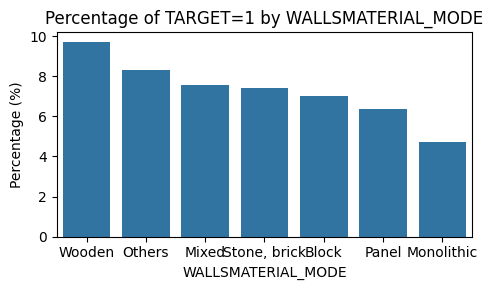

In [134]:
plot_feature_distribution(application_train, "WALLSMATERIAL_MODE", target_name="TARGET")

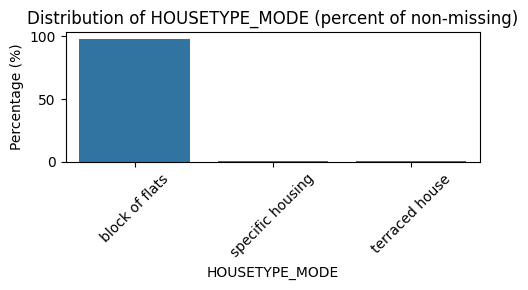

In [135]:
plot_feature_distribution(application_train, "HOUSETYPE_MODE", x_axis_rotation=45)

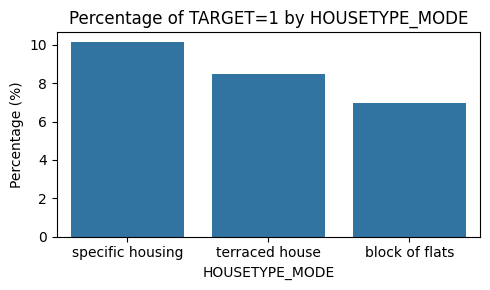

In [136]:
plot_feature_distribution(application_train, "HOUSETYPE_MODE", target_name="TARGET")

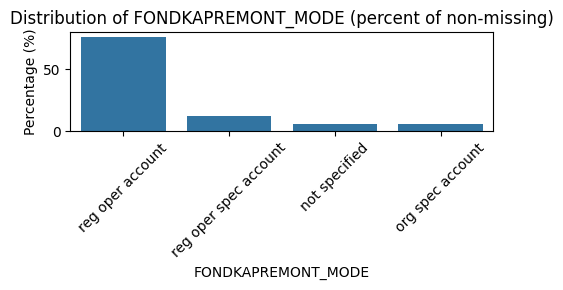

In [137]:
plot_feature_distribution(application_train, "FONDKAPREMONT_MODE", x_axis_rotation=45)

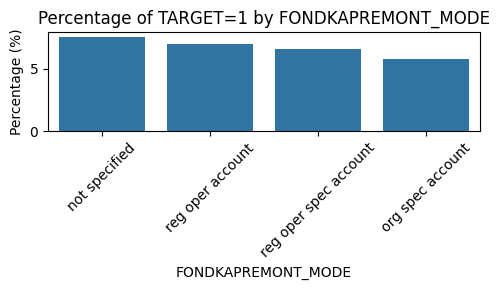

In [138]:
plot_feature_distribution(
    application_train, "FONDKAPREMONT_MODE", target_name="TARGET", x_axis_rotation=45
)

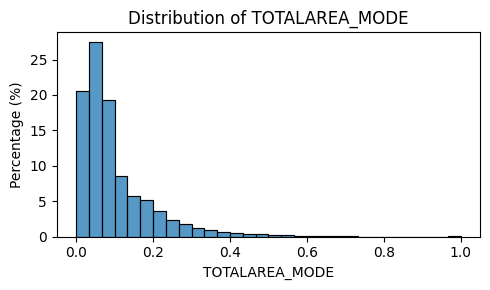

In [139]:
plot_feature_distribution(application_train, "TOTALAREA_MODE")

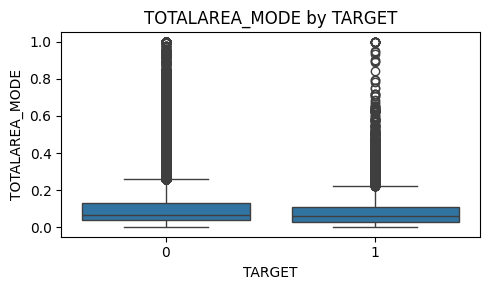

In [140]:
plot_feature_distribution(application_train, "TOTALAREA_MODE", target_name="TARGET")

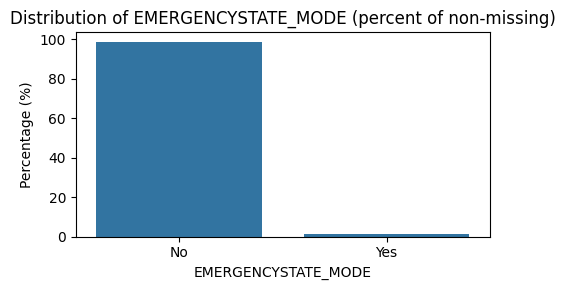

In [141]:
plot_feature_distribution(application_train, "EMERGENCYSTATE_MODE")

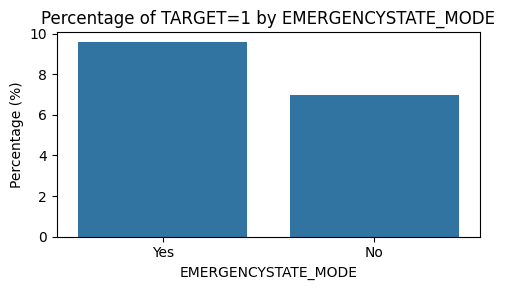

In [142]:
plot_feature_distribution(
    application_train, "EMERGENCYSTATE_MODE", target_name="TARGET"
)

##### 4.2.1.25. <a id='toc4_2_1_25_'></a>[Document flag features](#toc0_)

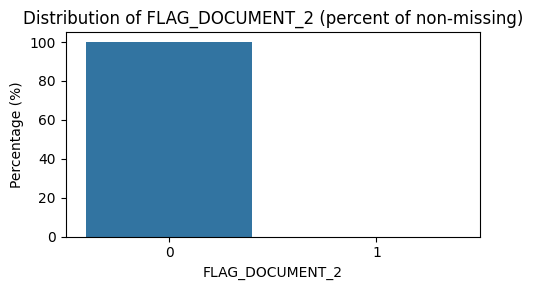

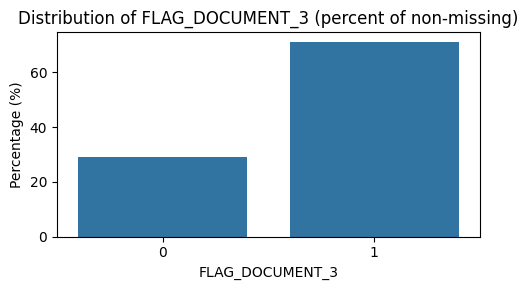

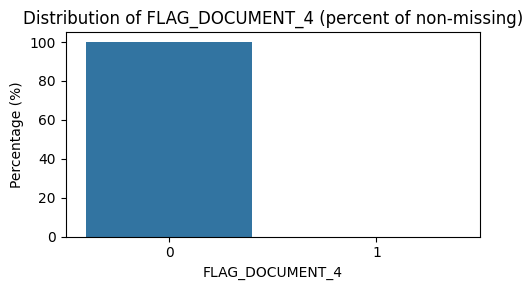

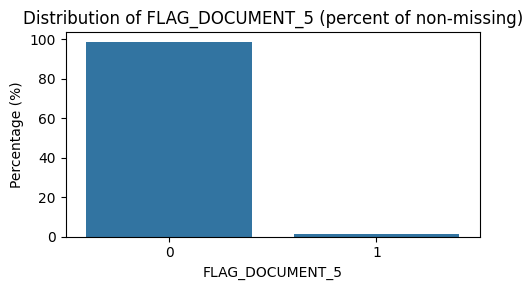

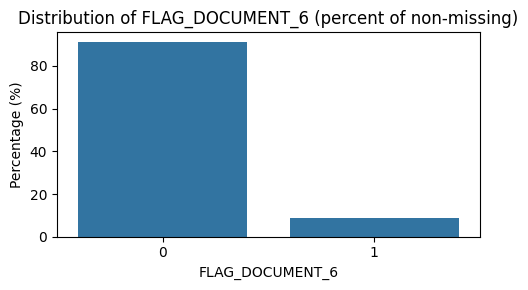

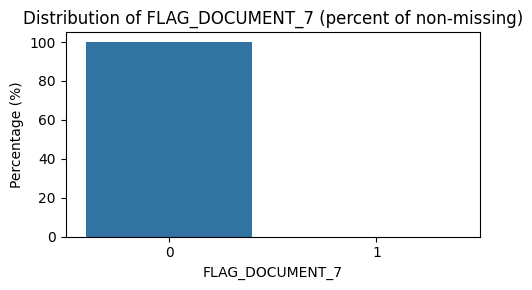

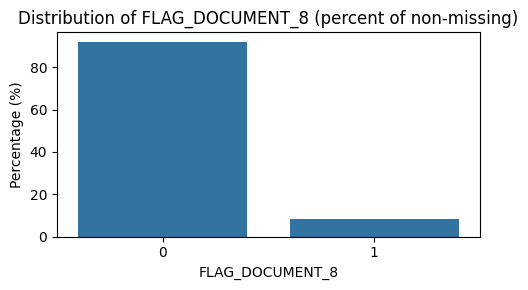

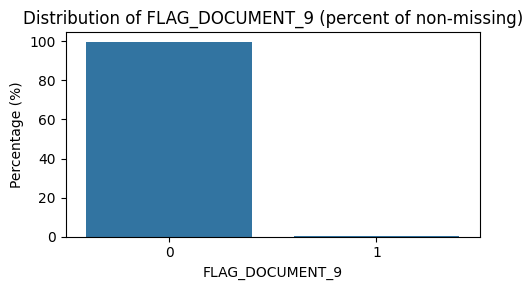

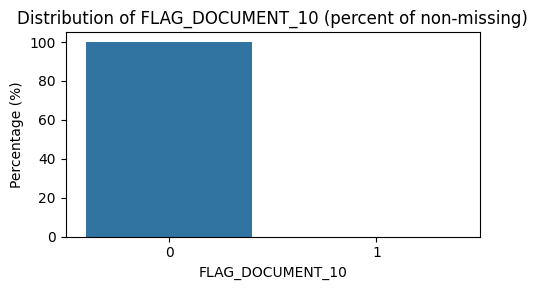

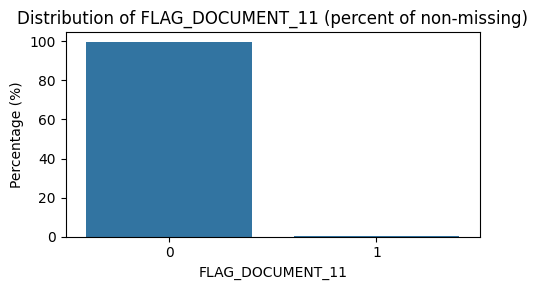

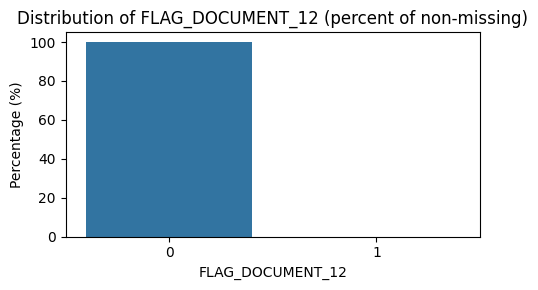

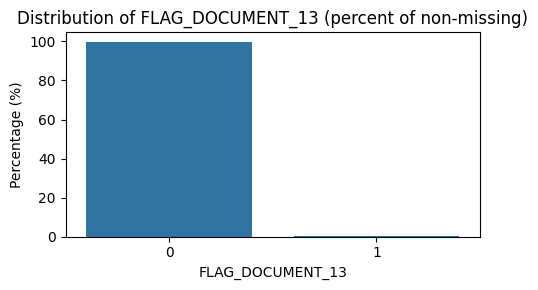

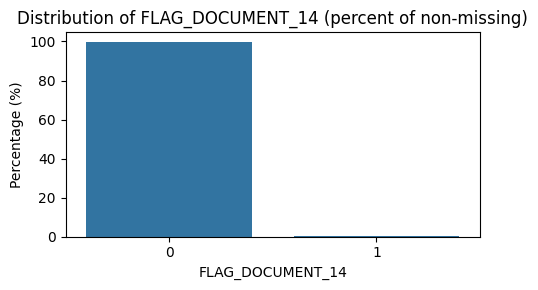

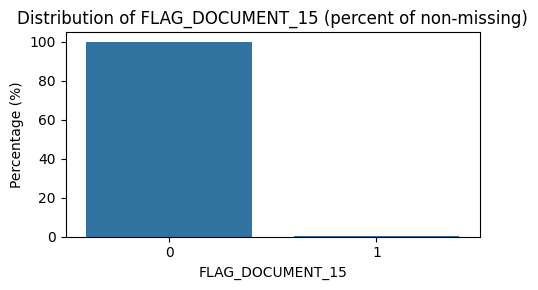

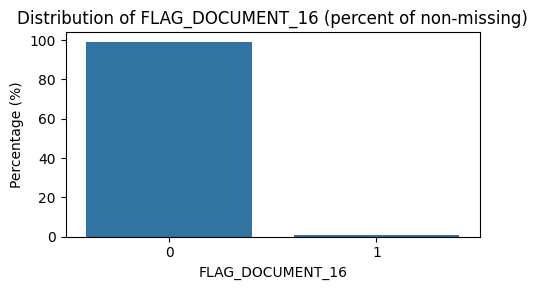

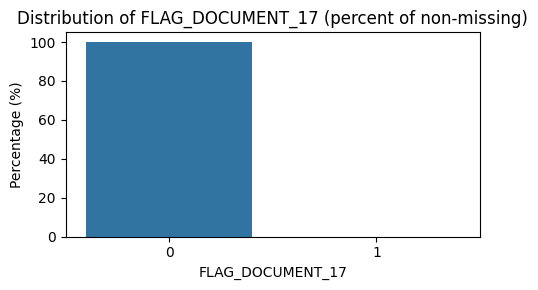

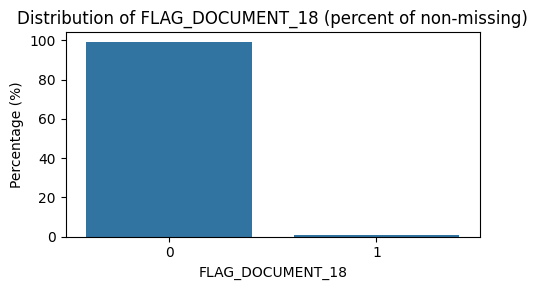

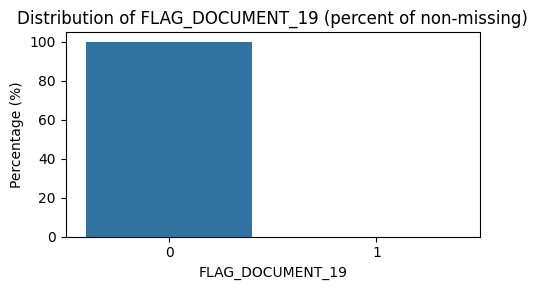

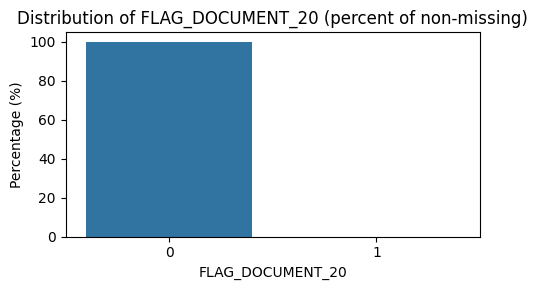

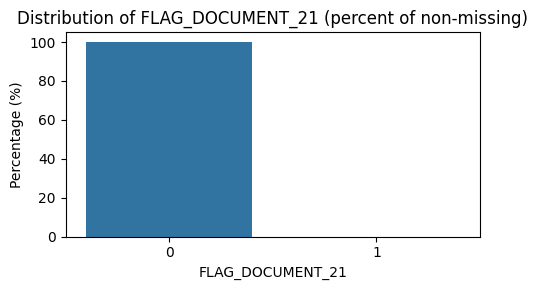

In [143]:
flag_document_cols = [f"FLAG_DOCUMENT_{i}" for i in range(2, 22)]

for col in flag_document_cols:
    plot_feature_distribution(application_train, col)

Only `FLAG_DOCUMENT_3`, `FLAG_DOCUMENT_6`, and `FLAG_DOCUMENT_8` show meaningful variance. We want to drop binary features with near-zero variance and automate this check as following:

In [144]:
def filter_low_variance_flags(df, threshold=0.01):
    flag_cols = [
        f"FLAG_DOCUMENT_{i}" for i in range(2, 22) if f"FLAG_DOCUMENT_{i}" in df.columns
    ]
    flag_data = df[flag_cols]

    selector = VarianceThreshold(threshold=threshold)
    selector.fit(flag_data)

    selected_flags = flag_data.columns[selector.get_support()].tolist()

    return df.drop(columns=[col for col in flag_cols if col not in selected_flags])

In [145]:
application_train = filter_low_variance_flags(application_train, threshold=0.01)

##### 4.2.1.26. <a id='toc4_2_1_26_'></a>[AMT_REQ_CREDIT_BUREAU features](#toc0_)

In [146]:
bureau_cols = [
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "AMT_REQ_CREDIT_BUREAU_YEAR",
]

In [147]:
application_train[bureau_cols].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265989.000000,265989.000000,265989.000000,265989.000000,265989.000000,265989.000000
mean,0.006403,0.007000,0.034359,0.267398,0.265477,1.899977
std,0.083850,0.110758,0.204677,0.916007,0.794060,1.869297
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


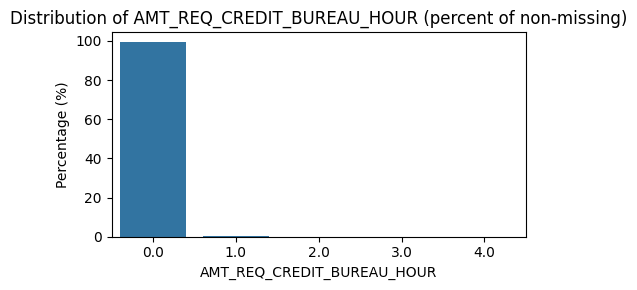

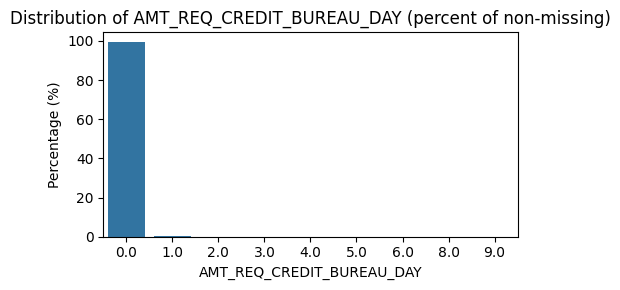

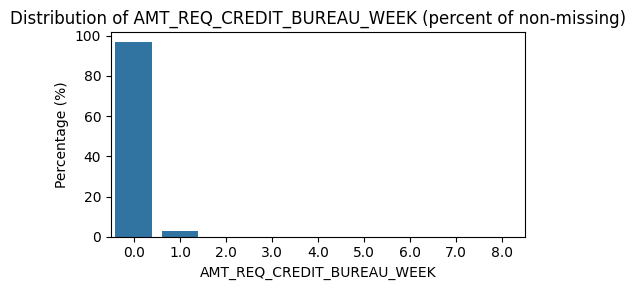

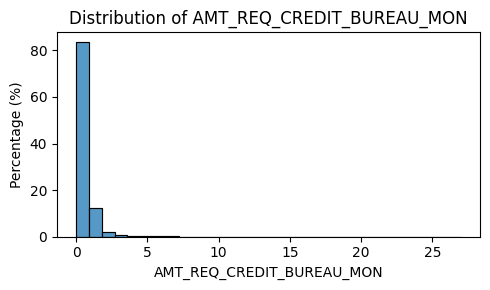

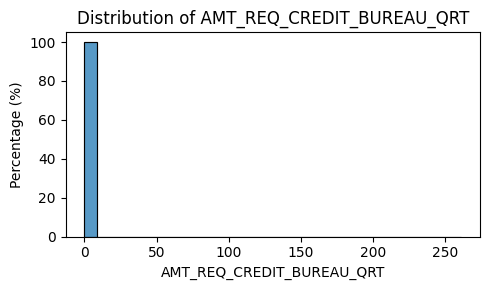

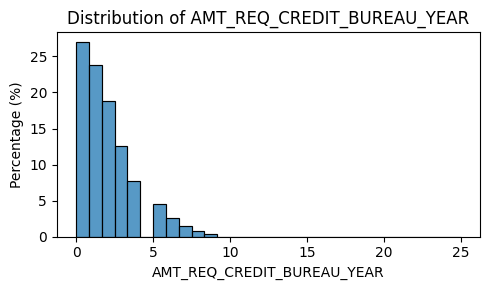

In [148]:
for col in bureau_cols:
    plot_feature_distribution(application_train, col)

It will be useful to have a total feature:

In [149]:
def add_total_bureau_requests(df):
    cols = [
        "AMT_REQ_CREDIT_BUREAU_HOUR",
        "AMT_REQ_CREDIT_BUREAU_DAY",
        "AMT_REQ_CREDIT_BUREAU_WEEK",
        "AMT_REQ_CREDIT_BUREAU_MON",
        "AMT_REQ_CREDIT_BUREAU_QRT",
        "AMT_REQ_CREDIT_BUREAU_YEAR",
    ]
    df["TOTAL_BUREAU_REQUESTS"] = df[cols].sum(axis=1)
    return df

In [150]:
add_total_bureau_requests(application_train)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AGE,CNT_CHILDREN_CAT,DEBT_TO_INCOME_RATIO,FLAG_GOODS_GT_CREDIT,EDUCATION_LEVEL,OCCUPATION_CLUSTER,CNT_FAM_MEMBERS_CAT,ORG_PREFIX_GROUP,ORGANIZATION_CLUSTER,TOTAL_BUREAU_REQUESTS
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,...,25,0,0.121978,True,1,Cluster_1,1.0,Business Entity,Cluster_2,1.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,...,45,0,0.132217,True,3,Cluster_1,2.0,School,Cluster_5,0.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,...,52,0,0.100000,False,1,Cluster_1,1.0,Government,Cluster_5,0.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,...,52,0,0.219900,True,1,Cluster_1,2.0,Business Entity,Cluster_2,0.0
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,...,54,0,0.179963,False,1,Cluster_1,1.0,Religion,Cluster_4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307501,456251,0,Cash loans,M,N,N,157500.0,254700.0,27558.0,225000.0,...,25,0,0.174971,True,1,Cluster_2,1.0,Services,Cluster_2,0.0
307502,456252,0,Cash loans,F,N,Y,72000.0,269550.0,12001.5,225000.0,...,56,0,0.166687,True,1,NaN,1.0,XNA,Cluster_3,0.0
307503,456253,0,Cash loans,F,N,Y,153000.0,677664.0,29979.0,585000.0,...,41,0,0.195941,True,3,Cluster_4,1.0,School,Cluster_5,3.0
307504,456254,1,Cash loans,F,N,Y,171000.0,370107.0,20205.0,319500.0,...,32,0,0.118158,True,1,Cluster_1,2.0,Business Entity,Cluster_2,0.0


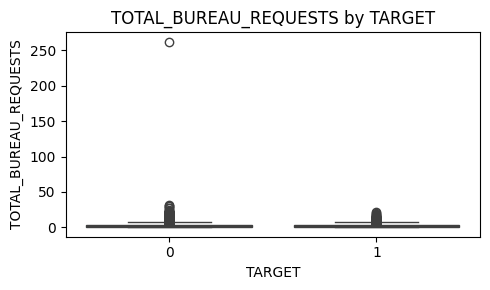

In [151]:
plot_feature_distribution(
    application_train, "TOTAL_BUREAU_REQUESTS", target_name="TARGET"
)

`AMT_REQ_CREDIT_BUREAU_HOUR` shows no meaningful variance and it consequently will be dropped:

In [152]:
def select_low_variance_columns(df, cols, threshold=0.01):
    from sklearn.feature_selection import VarianceThreshold

    selector = VarianceThreshold(threshold=threshold)
    selector.fit(df[cols])

    selected_cols = df[cols].columns[selector.get_support()].tolist()
    return selected_cols

In [153]:
selected_bureau_cols = select_low_variance_columns(
    application_train, bureau_cols, threshold=0.01
)
application_train = application_train[
    selected_bureau_cols
    + [col for col in application_train.columns if col not in bureau_cols]
]

##### 4.2.1.27. <a id='toc4_2_1_27_'></a>[SOCIAL_CIRCLE features](#toc0_)

In [154]:
social_circle_cols = [
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
]

In [155]:
application_train[social_circle_cols].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306485.000000,306485.000000,306485.000000,306485.000000
mean,1.422262,0.143423,1.405309,0.100051
std,2.401004,0.446702,2.379818,0.362294
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


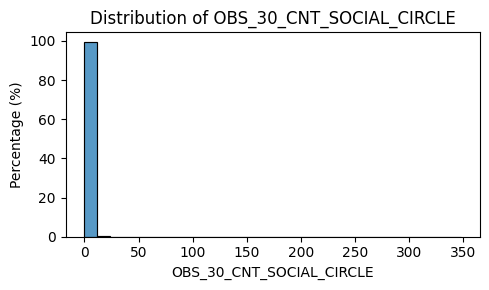

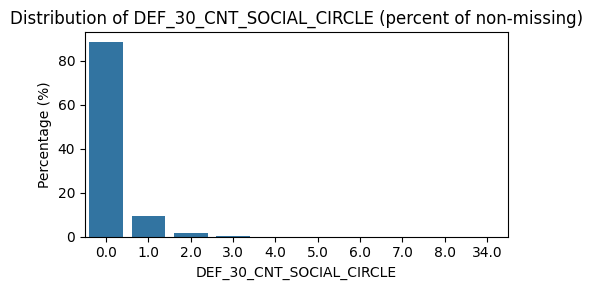

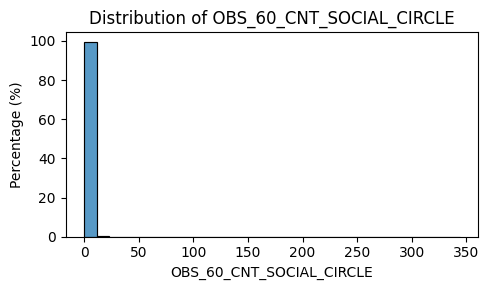

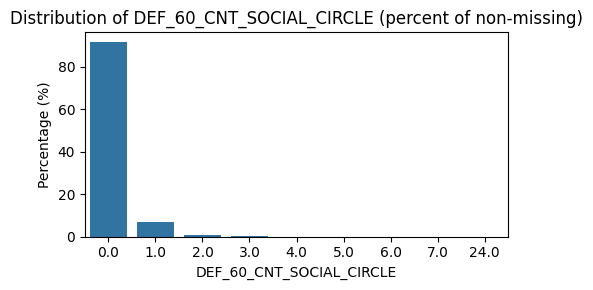

In [156]:
for col in social_circle_cols:
    plot_feature_distribution(application_train, col)

These are potentially very predictive features — someone surrounded by defaulters in its social circle might be at higher risk. We disregard the binning, a Tree-based model can handle it well.

Instead we want to create meaningful rations between the actual count of people who defaulted by the number of people in the applicant’s social circle for whom bureau data exists:

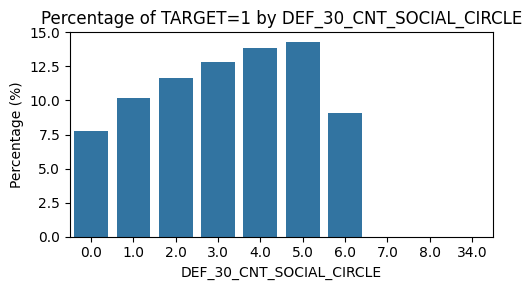

In [157]:
plot_feature_distribution(
    application_train, "DEF_30_CNT_SOCIAL_CIRCLE", target_name="TARGET"
)

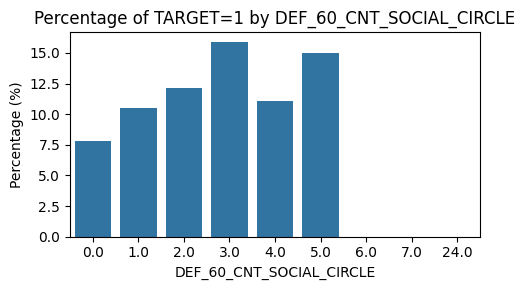

In [158]:
plot_feature_distribution(
    application_train, "DEF_60_CNT_SOCIAL_CIRCLE", target_name="TARGET"
)

In [159]:
def add_social_circle_default_ratios(df):
    df["RATIO_DEF_30"] = df["DEF_30_CNT_SOCIAL_CIRCLE"] / (
        df["OBS_30_CNT_SOCIAL_CIRCLE"] + 1e-5
    )
    df["RATIO_DEF_60"] = df["DEF_60_CNT_SOCIAL_CIRCLE"] / (
        df["OBS_60_CNT_SOCIAL_CIRCLE"] + 1e-5
    )
    return df

In [160]:
add_social_circle_default_ratios(application_train)

,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,DEBT_TO_INCOME_RATIO,FLAG_GOODS_GT_CREDIT,EDUCATION_LEVEL,OCCUPATION_CLUSTER,CNT_FAM_MEMBERS_CAT,ORG_PREFIX_GROUP,ORGANIZATION_CLUSTER,TOTAL_BUREAU_REQUESTS,RATIO_DEF_30,RATIO_DEF_60
0,0.0,0.0,0.0,0.0,1.0,100002,1,Cash loans,M,N,...,0.121978,True,1,Cluster_1,1.0,Business Entity,Cluster_2,1.0,0.999995,0.999995
1,0.0,0.0,0.0,0.0,0.0,100003,0,Cash loans,F,N,...,0.132217,True,3,Cluster_1,2.0,School,Cluster_5,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,100004,0,Revolving loans,M,Y,...,0.100000,False,1,Cluster_1,1.0,Government,Cluster_5,0.0,0.000000,0.000000
3,NaN,NaN,NaN,NaN,NaN,100006,0,Cash loans,F,N,...,0.219900,True,1,Cluster_1,2.0,Business Entity,Cluster_2,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,100007,0,Cash loans,M,N,...,0.179963,False,1,Cluster_1,1.0,Religion,Cluster_4,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307501,NaN,NaN,NaN,NaN,NaN,456251,0,Cash loans,M,N,...,0.174971,True,1,Cluster_2,1.0,Services,Cluster_2,0.0,0.000000,0.000000
307502,NaN,NaN,NaN,NaN,NaN,456252,0,Cash loans,F,N,...,0.166687,True,1,NaN,1.0,XNA,Cluster_3,0.0,0.000000,0.000000
307503,0.0,0.0,1.0,0.0,1.0,456253,0,Cash loans,F,N,...,0.195941,True,3,Cluster_4,1.0,School,Cluster_5,3.0,0.000000,0.000000
307504,0.0,0.0,0.0,0.0,0.0,456254,1,Cash loans,F,N,...,0.118158,True,1,Cluster_1,2.0,Business Entity,Cluster_2,0.0,0.000000,0.000000


##### 4.2.1.28. <a id='toc4_2_1_28_'></a>[EXT_SOURCE](#toc0_)

There are three external credit scores or risk indicators from third-party providers. The exact formulas are proprietary (not disclosed in the dataset), but they summarize a client's creditworthiness based on past behavior and/or financial variables.



In [161]:
ext_source_cols = [
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
]

In [162]:
application_train[ext_source_cols].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134130.000000,3.068460e+05,246543.000000
mean,0.502129,5.143923e-01,0.510855
std,0.211064,1.910593e-01,0.194844
min,0.014568,8.173617e-08,0.000527
25%,0.334007,3.924574e-01,0.370650
50%,0.505996,5.659641e-01,0.535276
75%,0.675060,6.636171e-01,0.669057
max,0.962693,8.549997e-01,0.896010


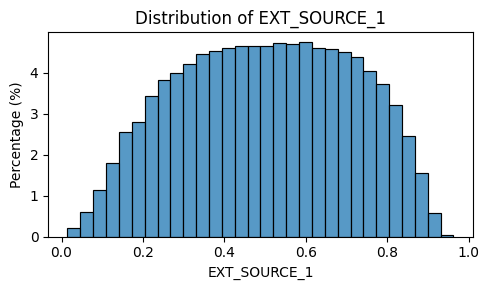

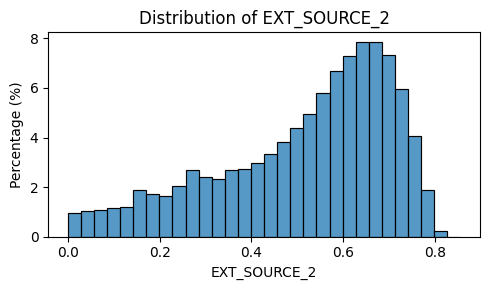

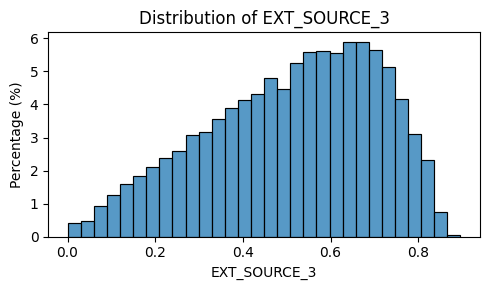

In [163]:
for col in ext_source_cols:
    plot_feature_distribution(application_train, col)

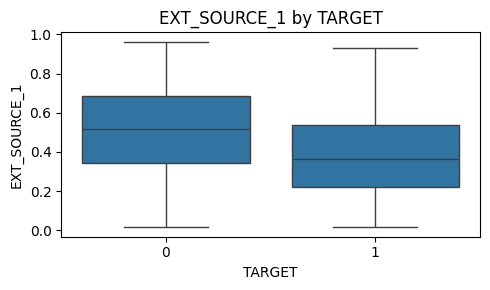

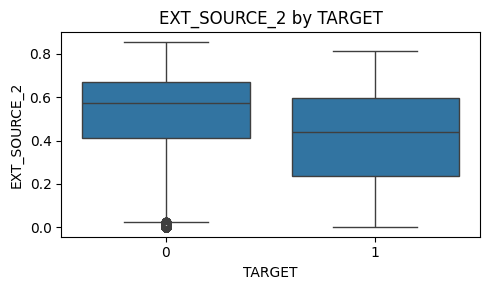

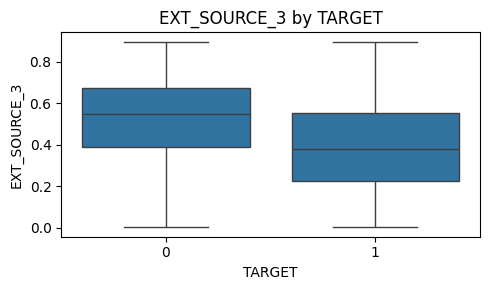

In [164]:
for col in ext_source_cols:
    plot_feature_distribution(application_train, col, target_name="TARGET")

##### 4.2.1.29. <a id='toc4_2_1_29_'></a>[DAYS_LAST_PHONE_CHANGE](#toc0_)

How many days before application did client change phone:

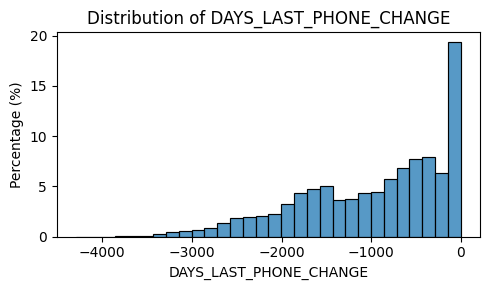

In [165]:
plot_feature_distribution(application_train, "DAYS_LAST_PHONE_CHANGE")

In [166]:
application_train.DAYS_LAST_PHONE_CHANGE.describe()

count    307505.000000
mean       -962.868448
std         826.809601
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

We use a flag to indicate those who recently - within the last year - changed their phone:

In [167]:
def add_recent_phone_change_flag(df, days=365):
    df["RECENT_PHONE_CHANGE"] = (df["DAYS_LAST_PHONE_CHANGE"] > -days).astype(int)
    return df.drop(columns=["DAYS_LAST_PHONE_CHANGE"])

In [168]:
add_recent_phone_change_flag(application_train, days=365)

,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,FLAG_GOODS_GT_CREDIT,EDUCATION_LEVEL,OCCUPATION_CLUSTER,CNT_FAM_MEMBERS_CAT,ORG_PREFIX_GROUP,ORGANIZATION_CLUSTER,TOTAL_BUREAU_REQUESTS,RATIO_DEF_30,RATIO_DEF_60,RECENT_PHONE_CHANGE
0,0.0,0.0,0.0,0.0,1.0,100002,1,Cash loans,M,N,...,True,1,Cluster_1,1.0,Business Entity,Cluster_2,1.0,0.999995,0.999995,0
1,0.0,0.0,0.0,0.0,0.0,100003,0,Cash loans,F,N,...,True,3,Cluster_1,2.0,School,Cluster_5,0.0,0.000000,0.000000,0
2,0.0,0.0,0.0,0.0,0.0,100004,0,Revolving loans,M,Y,...,False,1,Cluster_1,1.0,Government,Cluster_5,0.0,0.000000,0.000000,0
3,NaN,NaN,NaN,NaN,NaN,100006,0,Cash loans,F,N,...,True,1,Cluster_1,2.0,Business Entity,Cluster_2,0.0,0.000000,0.000000,0
4,0.0,0.0,0.0,0.0,0.0,100007,0,Cash loans,M,N,...,False,1,Cluster_1,1.0,Religion,Cluster_4,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307501,NaN,NaN,NaN,NaN,NaN,456251,0,Cash loans,M,N,...,True,1,Cluster_2,1.0,Services,Cluster_2,0.0,0.000000,0.000000,1
307502,NaN,NaN,NaN,NaN,NaN,456252,0,Cash loans,F,N,...,True,1,NaN,1.0,XNA,Cluster_3,0.0,0.000000,0.000000,1
307503,0.0,0.0,1.0,0.0,1.0,456253,0,Cash loans,F,N,...,True,3,Cluster_4,1.0,School,Cluster_5,3.0,0.000000,0.000000,0
307504,0.0,0.0,0.0,0.0,0.0,456254,1,Cash loans,F,N,...,True,1,Cluster_1,2.0,Business Entity,Cluster_2,0.0,0.000000,0.000000,1


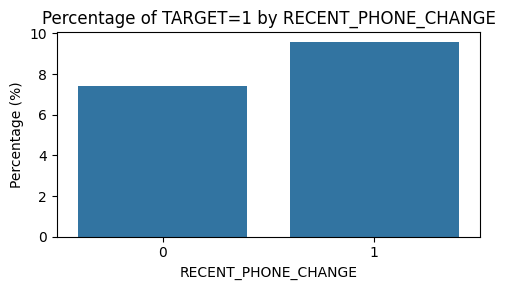

In [169]:
plot_feature_distribution(
    application_train, "RECENT_PHONE_CHANGE", target_name="TARGET"
)

In [170]:
application_train = application_train.drop(columns=["DAYS_LAST_PHONE_CHANGE"])

#### 4.2.2. <a id='toc4_2_2_'></a>[Missing values](#toc0_)

In [171]:
def missing_values_summary(df, threshold_percent=0):
    missing_count = df.isna().sum()
    missing_percent = 100 * missing_count / len(df)

    missing_df = (
        pd.DataFrame({"Missing Count": missing_count, "Missing %": missing_percent})
        .query("`Missing Count` > 0")
        .sort_values(by="Missing Count", ascending=False)
    )

    if threshold_percent > 0:
        missing_df = missing_df[missing_df["Missing %"] > threshold_percent]

    return missing_df


missing_values_summary(application_train, threshold_percent=10)

,Missing Count,Missing %
COMMONAREA_MEDI,214860,69.871807
NONLIVINGAPARTMENTS_MEDI,213509,69.432466
FONDKAPREMONT_MODE,210290,68.385658
LIVINGAPARTMENTS_MEDI,210194,68.354439
FLOORSMIN_MEDI,208637,67.848107
YEARS_BUILD_MEDI,204483,66.497239
OWN_CAR_AGE,202928,65.991558
LANDAREA_MEDI,182586,59.376402
BASEMENTAREA_MEDI,179939,58.515606
EXT_SOURCE_1,173376,56.381339


#### 4.2.3. <a id='toc4_2_3_'></a>[Handling Duplicates](#toc0_)

In [172]:
application_train.duplicated(
    subset=application_train.columns.difference(["SK_ID_CURR"])
).value_counts()

False    307506
Name: count, dtype: int64

None of the rows are identical to other rows by their values when looking at all the feature except of the unique identifier.

### 4.3. <a id='toc4_3_'></a>[Dataset aggregation](#toc0_)

**Assumption**

Due to the relational nature of the data and the decision to use tabular models and not Deep Learning or sequence models, we cannot use the raw granular data as is. We would need to aggregate the data and/or use feature engineering to encode sequences. Therefore, the main files (application_train.csv and application_test.csv) serve as the base and only **aggegated** features from secondary tables are merged into it. 

Downsides of Aggregation are the loss of information (temporal dynamics, sequential patterns, and variability within groups are collapsed) and the choice of aggregation can bias the model if important nuances are lost (e.g., last status is more predictive than sum or mean).

However advantages are the reduction of dimensionality and memory usage, and faster training and easier interpretability. Most ML models (e.g. XGBoost, LightGBM) can not handle sequences or nested tables and expect one row per entity.

**Process of Aggregation**

Step 1: For each secondary table aggegrated features are created. The type of aggregation (e.g., mean, sum, count, max, etc.) depends on the nature of the feature. 

Step 2: The aggregated features are merged into the base per unique identifier (SK_ID_CURR, SK_ID_PREV, SK_ID_BUREAU).

#### 4.3.1. <a id='toc4_3_1_'></a>[Step 1: subtables](#toc0_)

Each secondary table is further explored and features are aggregated.

##### 4.3.1.1. <a id='toc4_3_1_1_'></a>[bureau_balance](#toc0_)

In [173]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [174]:
feature_description[feature_description.Row == "STATUS"].Description

144    Status of Credit Bureau loan during the month (active, closed, DPD0-30,
 [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,
...
Name: Description, dtype: object

In [175]:
pd.concat(
    [
        bureau_balance["STATUS"].value_counts(),
        bureau_balance["STATUS"].value_counts(normalize=True).mul(100).round(2),
    ],
    axis=1,
    keys=["Count", "Share (%)"],
)

,Count,Share (%)
STATUS,,
C,13646993,49.99
0,7499507,27.47
X,5810482,21.28
1,242347,0.89
5,62406,0.23
2,23419,0.09
3,8924,0.03
4,5847,0.02


In [176]:
feature_description[
    (feature_description.Table == "bureau_balance.csv")
    & (feature_description.Row == "MONTHS_BALANCE")
].Description

143    Month of balance relative to application date (-1 means the freshest balance date)
Name: Description, dtype: object

Aggregate to **other-loan-level**:

In [177]:
status_dummies = pd.get_dummies(bureau_balance["STATUS"], prefix="STATUS")

bureau_balance_expanded = pd.concat(
    [bureau_balance[["SK_ID_BUREAU", "MONTHS_BALANCE"]], status_dummies], axis=1
)

agg_dict_bb = {"MONTHS_BALANCE": ["min", "max", "mean"]}
agg_dict_bb.update({col: ["sum"] for col in status_dummies.columns})

bureau_balance_agg = bureau_balance_expanded.groupby("SK_ID_BUREAU").agg(agg_dict_bb)

bureau_balance_agg.columns = [
    f"BB_{col[0]}_{col[1]}" for col in bureau_balance_agg.columns
]
bureau_balance_agg.reset_index(inplace=True)

In [178]:
bureau_balance_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817395 entries, 0 to 817394
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_BUREAU            817395 non-null  int64  
 1   BB_MONTHS_BALANCE_min   817395 non-null  int64  
 2   BB_MONTHS_BALANCE_max   817395 non-null  int64  
 3   BB_MONTHS_BALANCE_mean  817395 non-null  float64
 4   BB_STATUS_0_sum         817395 non-null  int64  
 5   BB_STATUS_1_sum         817395 non-null  int64  
 6   BB_STATUS_2_sum         817395 non-null  int64  
 7   BB_STATUS_3_sum         817395 non-null  int64  
 8   BB_STATUS_4_sum         817395 non-null  int64  
 9   BB_STATUS_5_sum         817395 non-null  int64  
 10  BB_STATUS_C_sum         817395 non-null  int64  
 11  BB_STATUS_X_sum         817395 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 74.8 MB


##### 4.3.1.2. <a id='toc4_3_1_2_'></a>[bureau](#toc0_)

In [179]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [180]:
bureau = bureau.merge(bureau_balance_agg, on="SK_ID_BUREAU", how="left")

`CREDIT_CURRENCY` feature:

In [181]:
feature_description[feature_description.Row == "CREDIT_CURRENCY"].Description

128    Recoded currency of the Credit Bureau credit
Name: Description, dtype: object

In [182]:
pd.concat(
    [
        bureau["CREDIT_CURRENCY"].value_counts(),
        bureau["CREDIT_CURRENCY"].value_counts(normalize=True).mul(100).round(2),
    ],
    axis=1,
    keys=["Count", "Share (%)"],
)

,Count,Share (%)
CREDIT_CURRENCY,,
currency 1,1715020,99.92
currency 2,1224,0.07
currency 3,174,0.01
currency 4,10,0.00


Currency conversion rates are unknown and currencies not identifiable (only placeholders). Therefore decision to drop all cases which are not currency 1 (~0.08%), in order to avoid introducing noisy monetary values with unknown scale.

In [183]:
bureau = bureau[bureau["CREDIT_CURRENCY"] == "currency 1"].copy()

`CREDIT_ACTIVE` feature:

In [184]:
feature_description[feature_description.Row == "CREDIT_ACTIVE"].Description

127    Status of the Credit Bureau (CB) reported credits
Name: Description, dtype: object

In [185]:
pd.concat(
    [
        bureau["CREDIT_ACTIVE"].value_counts(),
        bureau["CREDIT_ACTIVE"].value_counts(normalize=True).mul(100).round(2),
    ],
    axis=1,
    keys=["Count", "Share (%)"],
)

,Count,Share (%)
CREDIT_ACTIVE,,
Closed,1078062,62.86
Active,630426,36.76
Sold,6511,0.38
Bad debt,21,0.00


Only 21 records for `Bad debt` type of credits creates essentially just noise and possess risk of overfitting or meaningless variance. Therefore this status is not used to aggregate the other features by.

Aggegating **Bureau** features:

| Column                       | Description                                                                 | Aggregation Types                                                         |
| ---------------------------- | --------------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| **`CREDIT_ACTIVE`**          | Status of credit (`Active`, `Closed`, etc.)                             | Used for filtering; drop `Bad debt`, can group by status if needed      |
| **`CREDIT_CURRENCY`**        | Currency of the credit                                                  | **Drop** – not relevant                                                 |
| **`DAYS_CREDIT`**            | How many days before the application the credit was taken (negative number) | `mean`, `min`, `max` (recency of past credits)                                  |
| **`CREDIT_DAY_OVERDUE`**     | Days overdue on that credit                                                 | `max`, `mean`, `sum` — higher = more problematic                                |
| **`DAYS_CREDIT_ENDDATE`**    | Planned end date of the credit (relative to application)                    | `mean`, `min`, `max`                                                            |
| **`DAYS_ENDDATE_FACT`**      | Actual end date of the credit                                               | `mean`, `min`, `max` — can compare with planned to assess delays                |
| **`AMT_CREDIT_MAX_OVERDUE`** | Max overdue amount                                                          | `sum`, `mean`, `max`                                                            |
| **`CNT_CREDIT_PROLONG`**     | Number of times the credit was prolonged                                    | `sum`, `mean` — higher may indicate payment difficulties                        |
| **`AMT_CREDIT_SUM`**         | Total credit amount                                                         | `sum`, `mean`, `max` — key financial metric                                     |
| **`AMT_CREDIT_SUM_DEBT`**    | Current debt                                                                | `sum`, `mean` — indicates outstanding obligations                               |
| **`AMT_CREDIT_SUM_LIMIT`**   | Credit limit                                                                | `mean`, `max`, `sum`                                                            |
| **`AMT_CREDIT_SUM_OVERDUE`** | Amount overdue as of today                                                  | `sum`, `mean`, `max` — very important for risk                                  |
| **`CREDIT_TYPE`**            | Type of credit (e.g., car loan, consumer credit)                            | Count of each type (via `.value_counts()` per person)                           |
| **`DAYS_CREDIT_UPDATE`**     | Days before application that bureau info was last updated                   | `mean`, `max`, `min` — indicates freshness                                      |
| **`AMT_ANNUITY`**            | Monthly payment                                                             | `mean`, `sum`, `max` — helps with estimating financial burden                   |

Additionally we engineer some useful interactions that capture importatnt ratios and the total number of credit lines:

| Column                       | Description                                                                 | Aggregation Types                                                         |
| ---------------------------- | --------------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| `DEBT_RATIO`                     | Debt-to-credit ratio (sum level)                                | custom calc        |
| `OVERDUE_RATIO`                  | Overdue-to-credit ratio (sum level)                             | custom calc        |
| `BUREAU_LOAN_COUNT`              | Total number of bureau credit lines                             | count              |


Aggregate to **client-level**:

In [186]:
agg_dict = {
    "DAYS_CREDIT": ["min", "max", "mean"],
    "CREDIT_DAY_OVERDUE": ["max", "mean", "sum"],
    "DAYS_CREDIT_ENDDATE": ["min", "max", "mean"],
    "DAYS_ENDDATE_FACT": ["min", "max", "mean"],
    "AMT_CREDIT_MAX_OVERDUE": ["max", "mean", "sum"],
    "CNT_CREDIT_PROLONG": ["sum", "mean"],
    "AMT_CREDIT_SUM": ["sum", "mean", "max"],
    "AMT_CREDIT_SUM_DEBT": ["sum", "mean"],
    "AMT_CREDIT_SUM_LIMIT": ["sum", "mean"],
    "AMT_CREDIT_SUM_OVERDUE": ["sum", "mean", "max"],
    "DAYS_CREDIT_UPDATE": ["min", "max", "mean"],
    "AMT_ANNUITY": ["mean", "sum", "max"],
    "BB_MONTHS_BALANCE_min": ["min"],
    "BB_MONTHS_BALANCE_max": ["max"],
    "BB_MONTHS_BALANCE_mean": ["mean"],
    "BB_STATUS_0_sum": ["sum"],
    "BB_STATUS_1_sum": ["sum"],
    "BB_STATUS_2_sum": ["sum"],
    "BB_STATUS_3_sum": ["sum"],
    "BB_STATUS_4_sum": ["sum"],
    "BB_STATUS_5_sum": ["sum"],
    "BB_STATUS_C_sum": ["sum"],
    "BB_STATUS_X_sum": ["sum"],
}

In [187]:
def aggregate_bureau_full(bureau, agg_dict, statuses=["Active", "Closed", "Sold"]):
    """
    Aggregates bureau data:
    - Numeric features overall and by CREDIT_ACTIVE status
    - CREDIT_TYPE one-hot counts overall and by status
    - CREDIT_ACTIVE counts per status
    - Derived ratios and counts
    Returns one row per SK_ID_CURR with all aggregated features.
    """

    bureau_agg_full = bureau.groupby("SK_ID_CURR").agg(agg_dict)
    bureau_agg_full.columns = [
        "ALL_" + "_".join(col) for col in bureau_agg_full.columns
    ]
    bureau_agg_full.reset_index(inplace=True)

    status_aggs = []
    for status in statuses:
        subset = bureau[bureau["CREDIT_ACTIVE"] == status]
        if not subset.empty:
            agg = subset.groupby("SK_ID_CURR").agg(agg_dict)
            agg.columns = [f"{status.upper()}_" + "_".join(col) for col in agg.columns]
            agg.reset_index(inplace=True)
            status_aggs.append(agg)

    def credit_type_counts(df, prefix):
        dummies = pd.get_dummies(df["CREDIT_TYPE"], prefix=f"{prefix}_CREDIT_TYPE")
        dummies = pd.concat([df[["SK_ID_CURR"]], dummies], axis=1)
        return dummies.groupby("SK_ID_CURR").sum().reset_index()

    credit_type_all = credit_type_counts(bureau, prefix="ALL")
    credit_type_by_status = []
    for status in statuses:
        subset = bureau[bureau["CREDIT_ACTIVE"] == status]
        if not subset.empty:
            ct = credit_type_counts(subset, prefix=status.upper())
            credit_type_by_status.append(ct)

    credit_status_counts = (
        bureau.groupby(["SK_ID_CURR", "CREDIT_ACTIVE"]).size().unstack(fill_value=0)
    )
    credit_status_counts.columns = [
        f"CREDIT_ACTIVE_COUNT_{col.upper()}" for col in credit_status_counts.columns
    ]
    credit_status_counts.reset_index(inplace=True)

    debt_overdue = bureau.groupby("SK_ID_CURR")[
        ["AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_OVERDUE"]
    ].sum()
    debt_overdue["DEBT_RATIO"] = debt_overdue["AMT_CREDIT_SUM_DEBT"] / debt_overdue[
        "AMT_CREDIT_SUM"
    ].replace(0, np.nan)
    debt_overdue["OVERDUE_RATIO"] = debt_overdue[
        "AMT_CREDIT_SUM_OVERDUE"
    ] / debt_overdue["AMT_CREDIT_SUM"].replace(0, np.nan)
    debt_overdue = debt_overdue[["DEBT_RATIO", "OVERDUE_RATIO"]].reset_index()

    bureau_counts = (
        bureau.groupby("SK_ID_CURR").size().rename("BUREAU_LOAN_COUNT").reset_index()
    )

    bureau_features = bureau_agg_full
    for df in (
        status_aggs
        + [credit_type_all]
        + credit_type_by_status
        + [credit_status_counts, debt_overdue, bureau_counts]
    ):
        bureau_features = bureau_features.merge(df, on="SK_ID_CURR", how="left")

    return bureau_features

In [188]:
bureau_agg = aggregate_bureau_full(bureau, agg_dict)

In [189]:
bureau_agg.shape

(305773, 237)

##### 4.3.1.3. <a id='toc4_3_1_3_'></a>[installments_payments](#toc0_)

In [190]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


| Column                       | Description                                                                     | Aggregation Types                                         |
| ---------------------------- | ------------------------------------------------------------------------------- | --------------------------------------------------------- |
| **`NUM_INSTALMENT_VERSION`** | Version of the installment plan                                                 | `nunique` — number of different plans                     |
| **`NUM_INSTALMENT_NUMBER`**  | Installment sequence number                                                     | `max` — how many installments applicant had               |
| **`DAYS_INSTALMENT`**        | Scheduled day of installment (relative to application date)                     | `mean`, `min`, `max` — timing of payments                 |
| **`DAYS_ENTRY_PAYMENT`**     | Actual payment day (relative to application date)                               | `mean`, `min`, `max` — when applicant really paid         |
| **`AMT_INSTALMENT`**         | Scheduled payment amount                                                        | `sum`, `mean`, `max` — expected financial burden          |
| **`AMT_PAYMENT`**            | Actual payment made                                                             | `sum`, `mean`, `max` — actual paid amount                 |


Additionally we engineer some useful interactions that capture the nature of sequence data better:

| Column                       | Description                                                                     | Aggregation Types                                         |
| ---------------------------- | ------------------------------------------------------------------------------- | --------------------------------------------------------- |
| **`PAYMENT_DIFF`**           | Difference between expected and actual payment (`AMT_INSTALMENT - AMT_PAYMENT`) | `mean`, `sum`, `max`, `min` — underpayment or overpayment |
| **`PAYMENT_PERC`**           | Payment percentage (`AMT_PAYMENT / AMT_INSTALMENT`)                             | `mean`, `min`, `max` — 1 = fully paid, <1 = underpaid     |
| **`DPD`**           | Days past due (only positive values kept)                                   | `mean`, `sum`, `max` — key metric for payment punctuality                      |
| **`EARLY_PAYMENT`**           | Instalment paid before scheduled date (`DAYS_ENTRY_PAYMENT < DAYS_INSTALMENT`)                                  | binary (1 = early repayment, 0 = not)                       |


**Early Repayment**

We create another target value that carries information about the repayment behaviour of clients: `EARLY_REPAY`:

| Column                       | Description                                                                     | Aggregation Types                                         |
| ---------------------------- | ------------------------------------------------------------------------------- | --------------------------------------------------------- |
| **`EARLY_REPAY_LOAN`**           | Full loan paid before scheduled date | binary (1 = early repayment, 0 = not) - important target | 


In [191]:
schedule = (
    installments_payments.groupby("SK_ID_PREV")
    .agg({"NUM_INSTALMENT_NUMBER": "max", "DAYS_INSTALMENT": "max"})
    .rename(
        columns={
            "NUM_INSTALMENT_NUMBER": "EXPECTED_NUM_PAYMENTS",
            "DAYS_INSTALMENT": "EXPECTED_LAST_PAYMENT_DAY",
        }
    )
)

actual = (
    installments_payments.groupby("SK_ID_PREV")
    .agg({"NUM_INSTALMENT_NUMBER": "count", "DAYS_ENTRY_PAYMENT": "max"})
    .rename(
        columns={
            "NUM_INSTALMENT_NUMBER": "ACTUAL_NUM_PAYMENTS",
            "DAYS_ENTRY_PAYMENT": "ACTUAL_LAST_PAYMENT_DAY",
        }
    )
)

loan_summary = schedule.join(actual)

loan_summary["EARLY_REPAY_LOAN"] = (
    loan_summary["ACTUAL_NUM_PAYMENTS"] < loan_summary["EXPECTED_NUM_PAYMENTS"]
) & (
    loan_summary["ACTUAL_LAST_PAYMENT_DAY"] < loan_summary["EXPECTED_LAST_PAYMENT_DAY"]
)

installments_payments = installments_payments.merge(
    loan_summary["EARLY_REPAY_LOAN"], left_on="SK_ID_PREV", right_index=True, how="left"
)

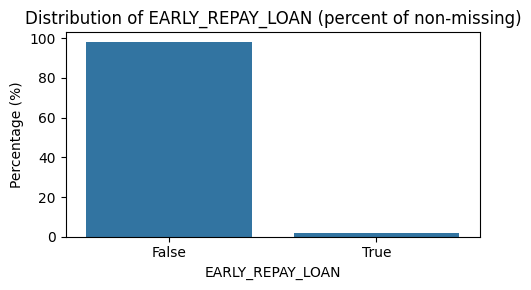

In [192]:
plot_feature_distribution(installments_payments, "EARLY_REPAY_LOAN")

**AMT_PAYMENT**

In [193]:
installments_payments.AMT_INSTALMENT.describe()

count    1.360540e+07
mean     1.705091e+04
std      5.057025e+04
min      0.000000e+00
25%      4.226085e+03
50%      8.884080e+03
75%      1.671021e+04
max      3.771488e+06
Name: AMT_INSTALMENT, dtype: float64

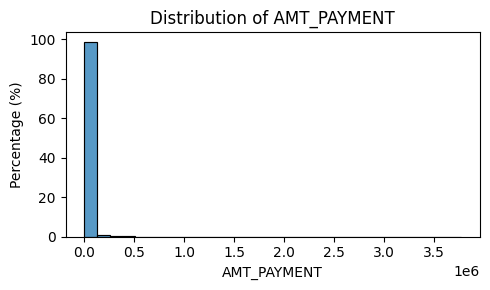

In [194]:
plot_feature_distribution(installments_payments, "AMT_PAYMENT")

**AMT_INSTALMENT**

The feature `AMT_INSTALMENT`shows anomalies. There are installments with the value zero, while the payment (`AMT_PAYMENT`) is larger than zero. It's likely an early, extra, or off-schedule payment (e.g. overpayment, or paying before the installment plan began). 
In some cases, it might be fees or penalties or could also be data inconsistencies or test payments.


In [195]:
installments_payments.AMT_INSTALMENT.describe()

count    1.360540e+07
mean     1.705091e+04
std      5.057025e+04
min      0.000000e+00
25%      4.226085e+03
50%      8.884080e+03
75%      1.671021e+04
max      3.771488e+06
Name: AMT_INSTALMENT, dtype: float64

In [196]:
(installments_payments["AMT_INSTALMENT"] == 0).sum()

290

This causes issues of calculating `PAYMENT_PERC` by inflating its values to infinity. We set the 290 values to NaN in the subsequent code:

In [197]:
installments_payments["AMT_INSTALMENT"] = installments_payments[
    "AMT_INSTALMENT"
].replace(0, np.nan)

Aggregate to **loan-level**:

In [198]:
agg_dict_inst = {
    "NUM_INSTALMENT_VERSION": ["nunique"],
    "NUM_INSTALMENT_NUMBER": ["max", "count"],
    "AMT_INSTALMENT": ["sum", "mean", "max"],
    "AMT_PAYMENT": ["sum", "mean", "max"],
    "DAYS_INSTALMENT": ["min", "max", "mean"],
    "DAYS_ENTRY_PAYMENT": ["min", "max", "mean"],
}

installments_payments["PAYMENT_PERC"] = (
    installments_payments["AMT_PAYMENT"] / installments_payments["AMT_INSTALMENT"]
)
installments_payments["PAYMENT_DIFF"] = (
    installments_payments["AMT_INSTALMENT"] - installments_payments["AMT_PAYMENT"]
)
installments_payments["DPD"] = (
    installments_payments["DAYS_ENTRY_PAYMENT"]
    - installments_payments["DAYS_INSTALMENT"]
)
installments_payments["DPD"] = installments_payments["DPD"].apply(
    lambda x: x if x > 0 else 0
)
installments_payments["EARLY_PAYMENT"] = (
    installments_payments["DAYS_ENTRY_PAYMENT"]
    < installments_payments["DAYS_INSTALMENT"]
)

agg_dict_inst.update(
    {
        "PAYMENT_PERC": ["mean", "std"],
        "PAYMENT_DIFF": ["mean", "std", "min", "max"],
        "DPD": ["mean", "sum", "max"],
        "EARLY_PAYMENT": ["mean", "sum"],
        "EARLY_REPAY_LOAN": ["max"],
    }
)

In [199]:
installments_agg = installments_payments.groupby("SK_ID_PREV").agg(agg_dict_inst)
installments_agg.columns = [
    "INST_" + "_".join(col).upper() for col in installments_agg.columns
]
installments_agg.reset_index(inplace=True)

##### 4.3.1.4. <a id='toc4_3_1_4_'></a>[credit_card_balance](#toc0_)

In [200]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

| Column                          | Description                                                                              | Aggregation Types                                                       |
| ------------------------------- | ---------------------------------------------------------------------------------------- | ----------------------------------------------------------------------- |
| **`MONTHS_BALANCE`**            | Month of the balance relative to application date (e.g., 0=current month, -1=last month) | `min`, `max`, `mean` — covers recency and range of credit card activity |
| **`AMT_BALANCE`**               | Balance amount on the credit card                                                        | `mean`, `max`, `sum` — shows typical and peak usage                     |
| **`AMT_CREDIT_LIMIT_ACTUAL`**   | Actual credit limit of the card                                                          | `mean`, `max` — credit capacity                                         |
| **`AMT_DRAWINGS_ATM_CURRENT`**  | Current ATM cash withdrawal amount                                                       | `sum`, `mean` — cash withdrawal behavior                                |
| **`AMT_DRAWINGS_CURRENT`**      | Total current drawings (cash and non-cash)                                               | `sum`, `mean` — overall card usage                                      |
| **`AMT_DRAWINGS_POS_CURRENT`**  | Point of Sale (POS) purchases current amount                                             | `sum`, `mean` — card payment behavior                                   |
| **`AMT_PAYMENT_CURRENT`**       | Payment made in the current month                                                        | `sum`, `mean` — payment activity                                        |
| **`AMT_PAYMENT_TOTAL_CURRENT`** | Total payment made so far in the current month                                           | `sum`, `mean` — payment history                                         |
| **`AMT_RECEIVABLE_PRINCIPAL`**  | Principal part of the amount owed                                                        | `mean`, `max` — outstanding principal                                   |
| **`AMT_RECIVABLE`**             | Total amount owed                                                                        | `mean`, `max`                                                           |
| **`AMT_TOTAL_RECEIVABLE`**      | Total amount receivable (principal + interest + penalties)                               | `mean`, `max`                                                           |
| **`CNT_DRAWINGS_CURRENT`**      | Number of drawings in the current month                                                  | `sum`, `mean`                                                           |
| **`CNT_DRAWINGS_ATM_CURRENT`**  | Number of ATM drawings in the current month                                              | `sum`, `mean`                                                           |
| **`CNT_DRAWINGS_POS_CURRENT`**  | Number of POS drawings in the current month                                              | `sum`, `mean`                                                           |
| **`SK_DPD`**                    | Days past due for the current period                                                     | `mean`, `max`, `sum` — reflects delinquency                             |
| **`SK_DPD_DEF`**                | Days past due (default)                                                                  | `mean`, `max`, `sum`                                                    |


Aggregate to **loan-level**:

In [201]:
agg_dict_ccb = {
    "MONTHS_BALANCE": ["min", "max", "mean"],
    "AMT_BALANCE": ["mean", "max", "sum"],
    "AMT_CREDIT_LIMIT_ACTUAL": ["mean", "max"],
    "AMT_DRAWINGS_ATM_CURRENT": ["sum", "mean"],
    "AMT_DRAWINGS_CURRENT": ["sum", "mean"],
    "AMT_DRAWINGS_POS_CURRENT": ["sum", "mean"],
    "AMT_PAYMENT_CURRENT": ["sum", "mean"],
    "AMT_PAYMENT_TOTAL_CURRENT": ["sum", "mean"],
    "AMT_RECEIVABLE_PRINCIPAL": ["mean", "max"],
    "AMT_RECIVABLE": ["mean", "max"],
    "AMT_TOTAL_RECEIVABLE": ["mean", "max"],
    "CNT_DRAWINGS_CURRENT": ["sum", "mean"],
    "CNT_DRAWINGS_ATM_CURRENT": ["sum", "mean"],
    "CNT_DRAWINGS_POS_CURRENT": ["sum", "mean"],
    "SK_DPD": ["mean", "max", "sum"],
    "SK_DPD_DEF": ["mean", "max", "sum"],
}

credit_card_agg = credit_card_balance.groupby("SK_ID_CURR").agg(agg_dict_ccb)

credit_card_agg.columns = [
    "CCB_" + "_".join(col).upper() for col in credit_card_agg.columns
]

credit_card_agg.reset_index(inplace=True)

##### 4.3.1.5. <a id='toc4_3_1_5_'></a>[previous_application](#toc0_)

In [202]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

| Column                           | Description                                                  | Aggregation Types                      |
| -------------------------------- | ------------------------------------------------------------ | -------------------------------------- |
| **`AMT_ANNUITY`**                | Loan annuity amount (monthly payment)                        | `mean`, `max`, `sum`                   |
| **`AMT_APPLICATION`**            | Loan amount applied for                                      | `mean`, `max`, `sum`                   |
| **`AMT_CREDIT`**                 | Approved loan amount                                         | `mean`, `max`, `sum`                   |
| **`AMT_DOWN_PAYMENT`**           | Down payment made                                            | `mean`, `max`, `sum`                   |
| **`AMT_GOODS_PRICE`**            | Price of goods for which loan was taken                      | `mean`, `max`, `sum`                   |
| **`HOUR_APPR_PROCESS_START`**    | Hour of the day loan application started                     | `mean`, `max`, `min`                   |
| **`RATE_DOWN_PAYMENT`**          | Down payment rate                                            | `mean`, `max`, `min`                   |
| **`DAYS_DECISION`**              | Days before application the decision was made                | `min`, `max`, `mean`                   |
| **`NAME_CONTRACT_STATUS`**       | Status of the previous application (Approved, Refused, etc.) | Count per status via one-hot encoding  |
| **`NAME_PAYMENT_TYPE`**          | Payment type (e.g., cash, installment)                       | Count per type via one-hot encoding    |
| **`NAME_CLIENT_TYPE`**           | Client type                                                  | Count per type via one-hot encoding    |
| **`NAME_CONTRACT_TYPE`**         | Contract type                                                | Count per type via one-hot encoding    |
| **`WEEKDAY_APPR_PROCESS_START`** | Weekday when application started                             | Count per weekday via one-hot encoding |


In [203]:
previous_app_full = previous_application.merge(
    installments_agg, on="SK_ID_PREV", how="left"
)

previous_app_full = previous_app_full.merge(
    credit_card_agg, on="SK_ID_CURR", how="left"
)

Aggregate to **client-level**:

In [ ]:
agg_dict_prev = {
    "AMT_ANNUITY": ["mean", "max", "sum"],
    "AMT_APPLICATION": ["mean", "max", "sum"],
    "AMT_CREDIT": ["mean", "max", "sum"],
    "AMT_DOWN_PAYMENT": ["mean", "max", "sum"],
    "AMT_GOODS_PRICE": ["mean", "max", "sum"],
    "HOUR_APPR_PROCESS_START": ["mean", "max", "min"],
    "RATE_DOWN_PAYMENT": ["mean", "max", "min"],
    "DAYS_DECISION": ["min", "max", "mean"],
    "CCB_MONTHS_BALANCE_MIN": "min",
    "CCB_MONTHS_BALANCE_MAX": "max",
    "CCB_MONTHS_BALANCE_MEAN": "mean",
    "CCB_AMT_BALANCE_MEAN": "mean",
    "CCB_AMT_BALANCE_MAX": "max",
    "CCB_AMT_BALANCE_SUM": "sum",
    "CCB_AMT_CREDIT_LIMIT_ACTUAL_MEAN": "mean",
    "CCB_AMT_CREDIT_LIMIT_ACTUAL_MAX": "max",
    "CCB_AMT_DRAWINGS_ATM_CURRENT_SUM": "sum",
    "CCB_AMT_DRAWINGS_ATM_CURRENT_MEAN": "mean",
    "CCB_AMT_DRAWINGS_CURRENT_SUM": "sum",
    "CCB_AMT_DRAWINGS_CURRENT_MEAN": "mean",
    "CCB_AMT_DRAWINGS_POS_CURRENT_SUM": "sum",
    "CCB_AMT_DRAWINGS_POS_CURRENT_MEAN": "mean",
    "CCB_AMT_PAYMENT_CURRENT_SUM": "sum",
    "CCB_AMT_PAYMENT_CURRENT_MEAN": "mean",
    "CCB_AMT_PAYMENT_TOTAL_CURRENT_SUM": "sum",
    "CCB_AMT_PAYMENT_TOTAL_CURRENT_MEAN": "mean",
    "CCB_AMT_RECEIVABLE_PRINCIPAL_MEAN": "mean",
    "CCB_AMT_RECEIVABLE_PRINCIPAL_MAX": "max",
    "CCB_AMT_RECIVABLE_MEAN": "mean",
    "CCB_AMT_RECIVABLE_MAX": "max",
    "CCB_AMT_TOTAL_RECEIVABLE_MEAN": "mean",
    "CCB_AMT_TOTAL_RECEIVABLE_MAX": "max",
    "CCB_CNT_DRAWINGS_CURRENT_SUM": "sum",
    "CCB_CNT_DRAWINGS_CURRENT_MEAN": "mean",
    "CCB_CNT_DRAWINGS_ATM_CURRENT_SUM": "sum",
    "CCB_CNT_DRAWINGS_ATM_CURRENT_MEAN": "mean",
    "CCB_CNT_DRAWINGS_POS_CURRENT_SUM": "sum",
    "CCB_CNT_DRAWINGS_POS_CURRENT_MEAN": "mean",
    "CCB_SK_DPD_MEAN": "mean",
    "CCB_SK_DPD_MAX": "max",
    "CCB_SK_DPD_SUM": "sum",
    "CCB_SK_DPD_DEF_MEAN": "mean",
    "CCB_SK_DPD_DEF_MAX": "max",
    "CCB_SK_DPD_DEF_SUM": "sum",
    "INST_NUM_INSTALMENT_VERSION_NUNIQUE": ["nunique"],
    "INST_NUM_INSTALMENT_NUMBER_MAX": ["max"],
    "INST_NUM_INSTALMENT_NUMBER_COUNT": ["count"],
    "INST_AMT_INSTALMENT_SUM": ["sum"],
    "INST_AMT_INSTALMENT_MEAN": ["mean"],
    "INST_AMT_INSTALMENT_MAX": ["max"],
    "INST_AMT_PAYMENT_SUM": ["sum"],
    "INST_AMT_PAYMENT_MEAN": ["mean"],
    "INST_AMT_PAYMENT_MAX": ["max"],
    "INST_DAYS_INSTALMENT_MIN": ["min"],
    "INST_DAYS_INSTALMENT_MAX": ["max"],
    "INST_DAYS_INSTALMENT_MEAN": ["mean"],
    "INST_DAYS_ENTRY_PAYMENT_MIN": ["min"],
    "INST_DAYS_ENTRY_PAYMENT_MAX": ["max"],
    "INST_DAYS_ENTRY_PAYMENT_MEAN": ["mean"],
    "INST_PAYMENT_PERC_MEAN": ["mean"],
    "INST_PAYMENT_PERC_STD": ["std"],
    "INST_PAYMENT_DIFF_MEAN": ["mean"],
    "INST_PAYMENT_DIFF_STD": ["std"],
    "INST_PAYMENT_DIFF_MIN": ["min"],
    "INST_PAYMENT_DIFF_MAX": ["max"],
    "INST_DPD_MEAN": ["mean"],
    "INST_DPD_SUM": ["sum"],
    "INST_DPD_MAX": ["max"],
    "INST_EARLY_PAYMENT_MEAN": ["mean"],
    "INST_EARLY_PAYMENT_SUM": ["sum"],
    "INST_EARLY_REPAY_LOAN_MAX": ["mean"],
}

categorical_cols = [
    "NAME_CONTRACT_STATUS",
    "NAME_PAYMENT_TYPE",
    "NAME_CLIENT_TYPE",
    "NAME_CONTRACT_TYPE",
    "WEEKDAY_APPR_PROCESS_START",
]

for col in categorical_cols:
    dummies = pd.get_dummies(previous_app_full[col], prefix=col)
    previous_app_full = pd.concat([previous_app_full, dummies], axis=1)

prev_num_agg = previous_app_full.groupby("SK_ID_CURR").agg(agg_dict_prev)
prev_num_agg.columns = ["PREV_" + "_".join(col).upper() for col in prev_num_agg.columns]

prev_cat_cols = [
    c
    for c in previous_app_full.columns
    if any(c.startswith(col + "_") for col in categorical_cols)
]
prev_cat_agg = previous_app_full.groupby("SK_ID_CURR")[prev_cat_cols].sum()

previous_agg = pd.concat([prev_num_agg, prev_cat_agg], axis=1).reset_index()

##### 4.3.1.6. <a id='toc4_3_1_6_'></a>[POS_CASH_balance](#toc0_)

In [205]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


| Column                      | Description                                  | Aggregation Types                                               |
| --------------------------- | -------------------------------------------- | --------------------------------------------------------------- |
| **`MONTHS_BALANCE`**        | Month of record relative to application date | `min`, `max`, `mean` — recency and spread of cash loan activity |
| **`SK_DPD`**                | Days past due for the installment payment    | `mean`, `max`, `sum` — measures lateness/delinquency            |
| **`SK_DPD_DEF`**            | Days past due default (severe delinquency)   | `mean`, `max`, `sum`                                            |
| **`CNT_INSTALMENT`**        | Number of installments for the loan          | `mean`, `max` — loan size estimate                              |
| **`CNT_INSTALMENT_FUTURE`** | Number of remaining installments             | `mean`, `max` — remaining debt burden                           |


Aggregate to **client-level**:

In [206]:
agg_dict_pos = {
    "MONTHS_BALANCE": ["min", "max", "mean"],
    "SK_DPD": ["mean", "max", "sum"],
    "SK_DPD_DEF": ["mean", "max", "sum"],
    "CNT_INSTALMENT": ["mean", "max"],
    "CNT_INSTALMENT_FUTURE": ["mean", "max"],
}

pos_cash_agg = POS_CASH_balance.groupby("SK_ID_CURR").agg(agg_dict_pos)

pos_cash_agg.columns = ["POS_" + "_".join(col).upper() for col in pos_cash_agg.columns]

pos_cash_agg.reset_index(inplace=True)

#### 4.3.2. <a id='toc4_3_2_'></a>[LOAN_HISTORY_TYPE](#toc0_)

We create another feature that indicates if there is prior loan history from other instiuttions or Home Credit, both, or none.

In [238]:
def add_loan_history_feature(df, bureau_agg_df, previous_agg_df):
    """
    Adds a 'LOAN_HISTORY_TYPE' feature to a DataFrame based on previous loans.

    This function determines a client's loan history type based on whether they have
    records in the bureau (other institutions) and previous (Home Credit) loan datasets.

    Args:
        df (pd.DataFrame): The main DataFrame to which the new feature will be added.
        bureau_agg_df (pd.DataFrame): The aggregated bureau data containing client IDs
                                      with loans from other institutions.
        previous_agg_df (pd.DataFrame): The aggregated previous application data
                                        containing client IDs with loans from Home Credit.

    Returns:
        pd.DataFrame: The original DataFrame with the new 'LOAN_HISTORY_TYPE' column.
    """
    is_in_bureau = df["SK_ID_CURR"].isin(bureau_agg_df["SK_ID_CURR"])
    is_in_previous = df["SK_ID_CURR"].isin(previous_agg_df["SK_ID_CURR"])

    conditions = [
        (is_in_bureau) & (is_in_previous),
        (is_in_bureau) & (~is_in_previous),
        (~is_in_bureau) & (is_in_previous),
    ]

    choices = ["From both", "From others only", "From Home Credit only"]

    df["LOAN_HISTORY_TYPE"] = np.select(conditions, choices, default="No other loans")

    return df

In [239]:
application_train = add_loan_history_feature(
    application_train, bureau_agg, previous_agg
)

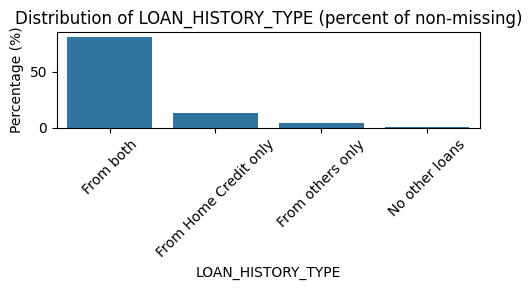

In [240]:
plot_feature_distribution(application_train, "LOAN_HISTORY_TYPE", x_axis_rotation=45)

In [241]:
application_train.LOAN_HISTORY_TYPE.value_counts()

LOAN_HISTORY_TYPE
From both                249484
From Home Credit only     41569
From others only          13970
No other loans             2483
Name: count, dtype: int64

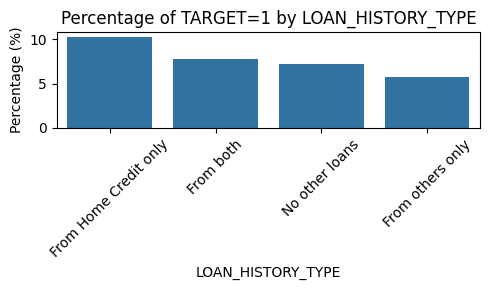

In [242]:
plot_feature_distribution(
    application_train, "LOAN_HISTORY_TYPE", target_name="TARGET", x_axis_rotation=45
)

#### 4.3.2. <a id='toc4_3_2_'></a>[Step 2: merge into main table](#toc0_)

**Initial feature selection**

Following features were dropped due to irrelvance based on domain knowledge:

| Feature/Column              | Table Source           | Reason to Deselect         |
|----------------------------|------------------------|----------------------------|
| WEEKDAY_APPR_PROCESS_START | application  | Irrelevant for target       |
| HOUR_APPR_PROCESS_START    | application  | Irrelevant for target       |


In [243]:
columns_to_drop = ["WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START"]
app_train_merged = application_train.copy()

app_train_merged = app_train_merged.drop(columns=columns_to_drop)

In [244]:
app_train_merged = app_train_merged.merge(bureau_agg, how="left", on="SK_ID_CURR")

app_train_merged = app_train_merged.merge(previous_agg, how="left", on="SK_ID_CURR")

app_train_merged = app_train_merged.merge(pos_cash_agg, how="left", on="SK_ID_CURR")

### 4.5. <a id='toc4_5_'></a>[Aggregated features from subtables](#toc0_)

#### 4.5.1. <a id='toc4_5_1_'></a>[PREV_INST_AMT_PAYMENT_SUM_SUM](#toc0_)


`PREV_INST_AMT_PAYMENT_SUM_SUM` has been identified as a moderately good predictor, when using its sum aggregation.

In [ ]:
app_train_merged.PREV_INST_AMT_PAYMENT_SUM_SUM.describe()

count    2.910530e+05
mean     6.631885e+05
std      9.001478e+05
min      0.000000e+00
25%      1.274290e+05
50%      3.099009e+05
75%      8.114573e+05
max      2.553705e+07
Name: PREV_INST_AMT_PAYMENT_SUM_SUM, dtype: float64

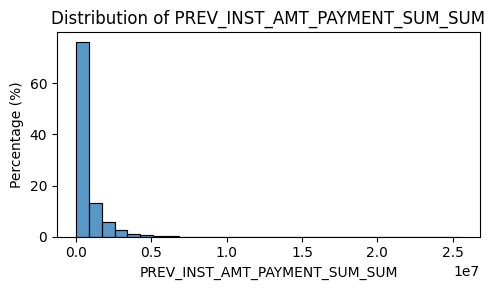

In [ ]:
plot_feature_distribution(app_train_merged, "PREV_INST_AMT_PAYMENT_SUM_SUM")

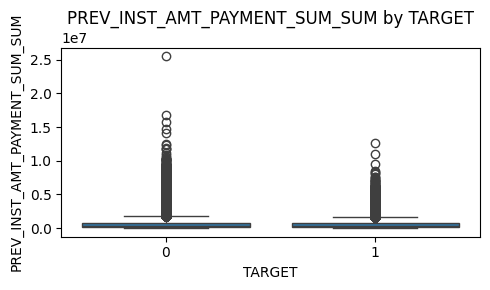

In [ ]:
plot_feature_distribution(
    app_train_merged, "PREV_INST_AMT_PAYMENT_SUM_SUM", target_name="TARGET"
)

#### 4.3.2. <a id='toc4_3_2_'></a>[Final train data saving](#toc0_)

In [245]:
app_train_merged.shape

(307506, 443)

We finally created a flat training datafile with over 430 potentially meaningful features and with all the (aggregated) information from the subtables included.

In [229]:
app_train_merged.to_parquet("../data/processed/app_train_merged.parquet")

In [211]:
app_train_merged = pd.read_parquet("../data/processed/app_train_merged.parquet")

#### 4.3.4. <a id='toc4_3_4_'></a>[Processing test data](#toc0_)

Firstly we need to apply all changes also to the test data file:

##### 4.3.4.1. <a id='toc4_3_4_1_'></a>[Encoding test data](#toc0_)

In [232]:
def apply_selected_columns(df, selected_cols, bureau_cols):
    cols_to_drop = [
        col for col in bureau_cols if col not in selected_cols and col in df.columns
    ]
    return df.drop(columns=cols_to_drop)

In [233]:
def process_application_data(df):
    df = remove_invalid_gender(df)
    df = age_from_days_birth(df)
    df = convert_yn_to_bool(df, "FLAG_OWN_CAR")
    df = add_dti(df)
    df = flag_inconsistent_credit_cases(df)
    df = merge_academic_degree_into_higher(df)
    df = encode_education_level(df)
    df = bin_upper_threshold(
        df,
        source_col="CNT_CHILDREN",
        target_col="CNT_CHILDREN_CAT",
        threshold=3,
        drop_original=True,
    )
    df = bin_upper_threshold(
        df,
        source_col="CNT_FAM_MEMBERS",
        target_col="CNT_FAM_MEMBERS_CAT",
        threshold=6,
        drop_original=True,
    )
    df = drop_duplicate_avg_mode_features(df)
    df = filter_low_variance_flags(df)
    df = add_total_bureau_requests(df)
    df = apply_selected_columns(df, selected_bureau_cols, bureau_cols)
    df = add_social_circle_default_ratios(df)
    df = add_recent_phone_change_flag(df)
    df["ORG_PREFIX_GROUP"] = df["ORGANIZATION_TYPE"].apply(group_by_prefix)
    df = df.merge(org_clusters, how="left", on="ORGANIZATION_TYPE")
    df = df.merge(occupation_clusters, how="left", on="OCCUPATION_TYPE")
    df = df.drop(columns=columns_to_drop)
    df = add_loan_history_feature(df, bureau_agg, previous_agg)
    return df

In [234]:
application_test = process_application_data(application_test)

##### 4.3.4.2. <a id='toc4_3_4_2_'></a>[Step 2: merge into application_test](#toc0_)

Then we can merge:

In [235]:
app_test_merged = application_test.copy()

app_test_merged = app_test_merged.merge(bureau_agg, how="left", on="SK_ID_CURR")

app_test_merged = app_test_merged.merge(previous_agg, how="left", on="SK_ID_CURR")

app_test_merged = app_test_merged.merge(pos_cash_agg, how="left", on="SK_ID_CURR")

In [236]:
app_test_merged.shape

(48744, 442)

Check if both datasets are processed equally:

In [246]:
train_cols = set(app_train_merged.columns)
test_cols = set(app_test_merged.columns)

only_in_train = train_cols - test_cols
only_in_test = test_cols - train_cols

print("Columns only in train data:")
print(sorted(only_in_train))

print("\nColumns only in test data:")
print(sorted(only_in_test))

Columns only in train data:
['TARGET']

Columns only in test data:
[]


Only the TARGET is different, and that's correct.

#### 4.3.2. <a id='toc4_3_2_'></a>[Final test data saving](#toc0_)

We finally created also the flat test datafile with over 430 potentially meaningful features and with all the (aggregated) information from the subtables included.

In [247]:
app_test_merged.to_parquet("../data/processed/app_test_merged.parquet")

In [248]:
app_test_merged = pd.read_parquet("../data/processed/app_test_merged.parquet")

### 4.4. <a id='toc4_4_'></a>[Multicollinearity testing](#toc0_)

While the CatBoost - our best performing algorithm - is generally robust and performs well even in the presence of multicollinearity, there are two main reasons to still check for it:

- **Feature Importance Interpretation:** When features are highly correlated, the feature importance scores from CatBoost can be misleading. The model might arbitrarily assign importance to one of the correlated features, making it difficult to understand which variables are truly driving the predictions.

- **Dimensionality Reduction:** Identifying and removing redundant, highly correlated features can simplify the model and improve training efficiency, especially in datasets with a large number of features. A simpler model is often easier to maintain and can be a good starting point for further optimization.



#### 4.4.1. <a id='toc4_4_1_'></a>[Variance Inflation Factor (VIF)](#toc0_)

In [228]:
df_to_analyze = app_train_merged.copy()

n_samples_for_vif = 30000
print(f"Sampling {n_samples_for_vif} observations from the full dataset.")
df_sampled = df_to_analyze.sample(n=n_samples_for_vif, random_state=42)

columns_to_exclude = ["SK_ID_CURR", "TARGET"]
all_features = [col for col in df_sampled.columns if col not in columns_to_exclude]

numerical_features = (
    df_sampled[all_features]
    .select_dtypes(include=["int64", "float64"])
    .columns.tolist()
)
categorical_features = (
    df_sampled[all_features].select_dtypes(include=["object"]).columns.tolist()
)

if categorical_features:
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    encoded_features = encoder.fit_transform(df_sampled[categorical_features])
    encoded_df = pd.DataFrame(
        encoded_features,
        columns=encoder.get_feature_names_out(categorical_features),
        index=df_sampled.index,
    )

    numerical_df = df_sampled[numerical_features]
    df_final = pd.concat([numerical_df, encoded_df], axis=1)

else:
    print(
        "\nNo categorical features found in the sample. Analyzing only numerical features."
    )
    df_final = df_sampled[numerical_features]


def calculate_vif(df):
    """
    Calculates the VIF for each feature in a DataFrame.
    """
    df = df.loc[:, (df != 0).any(axis=0)]

    print(f"Initial rows before cleaning: {df.shape[0]}")

    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    imputer = SimpleImputer(strategy="median")

    df_imputed = pd.DataFrame(
        imputer.fit_transform(df), columns=df.columns, index=df.index
    )

    print(
        f"Number of rows analyzed for VIF after cleaning and imputation: {df_imputed.shape[0]}"
    )

    if df_imputed.empty:
        print("Warning: DataFrame is empty after dropping rows with missing values.")
        return pd.DataFrame(columns=["feature", "VIF"])

    vif_data = pd.DataFrame()
    vif_data["feature"] = df_imputed.columns
    vif_data["VIF"] = [
        variance_inflation_factor(df_imputed.values, i)
        for i in range(len(df_imputed.columns))
    ]
    return vif_data


vif_results = calculate_vif(df_final)

if not vif_results.empty:
    vif_results = vif_results.sort_values(by="VIF", ascending=False).reset_index(
        drop=True
    )
else:
    print("\nNo VIF results to display.")

Sampling 30000 observations from the full dataset.
Initial rows before cleaning: 30000
Number of rows analyzed for VIF after cleaning and imputation: 30000


c:\Users\JO-840-G5\Desktop\py4e\jwerne-DS.v2.5.3.4.1\home_credit\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\JO-840-G5\Desktop\py4e\jwerne-DS.v2.5.3.4.1\home_credit\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\JO-840-G5\Desktop\py4e\jwerne-DS.v2.5.3.4.1\home_credit\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [240]:
vif_results[(np.isinf(vif_results["VIF"]))].sort_values(by="feature").reset_index(
    drop=True
)

,feature,VIF
0,ACTIVE_AMT_ANNUITY_sum,inf
1,ACTIVE_AMT_CREDIT_MAX_OVERDUE_sum,inf
2,ACTIVE_AMT_CREDIT_SUM_DEBT_sum,inf
3,ACTIVE_AMT_CREDIT_SUM_LIMIT_sum,inf
4,ACTIVE_AMT_CREDIT_SUM_OVERDUE_sum,inf
...,...,...
275,WALLSMATERIAL_MODE_None,inf
276,WALLSMATERIAL_MODE_Others,inf
277,WALLSMATERIAL_MODE_Panel,inf
278,"WALLSMATERIAL_MODE_Stone, brick",inf


In [235]:
vif_results[(vif_results["VIF"] > 5) & (~np.isinf(vif_results["VIF"]))].sort_values(
    by="VIF", ascending=False
).reset_index(drop=True)

,feature,VIF
0,NAME_CLIENT_TYPE_XNA,9.007199e+15
1,SOLD_BB_STATUS_4_sum_sum,9.007199e+15
2,ORGANIZATION_TYPE_Trade: type 5,9.007199e+15
3,SOLD_CNT_CREDIT_PROLONG_sum,9.007199e+15
4,ORG_PREFIX_GROUP_Advertising,9.007199e+15
...,...,...
236,FLAG_DOCUMENT_6,5.268008e+00
237,PREV_AMT_DOWN_PAYMENT_MEAN,5.238012e+00
238,ALL_DAYS_CREDIT_ENDDATE_min,5.096222e+00
239,ALL_AMT_CREDIT_SUM_LIMIT_mean,5.089556e+00


In [236]:
vif_results[vif_results.feature.isin(["EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1"])]

,feature,VIF
559,EXT_SOURCE_3,1.638719
569,EXT_SOURCE_1,1.286608
571,EXT_SOURCE_2,1.213005


**Summary**

The initial check revealed high multicollinearity, particularly among ***one-hot-encoded features***, ***multiple aggregated features*** (ending with _MEAN, SUM, etc.) or features with deliberately ***multiple variations/versions*** (e.g. clustered and recoded organisation, occupation data). That's shown in the infinite VIF scores and the high VIF scores above 5: They mainly or all come from these three types of features. This is a common and often manageable situation for tree-based models like CatBoost. These models are inherently robust to multicollinearity because they don't rely on the independence of features in the same way linear models do.

Instead of spending valuable time on extensive iterative manual feature removal, we'll adopt a more pragmatic approach. We'll proceed with the full dataset, trusting that the model's built-in feature selection mechanisms will handle these correlations naturally. The subsequent **feature importance analysis** (see modeling notebook: eli5, LossFunctionChange, PredictionValuesChange, ShapValues) and targeted feature selection (based on the `PredictionValuesChange` importance) will effectively simplify the model by identifying and prioritizing the most impactful features, while implicitly discarding redundant ones.